<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/TEST_1651-1700.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10610]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [10611]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

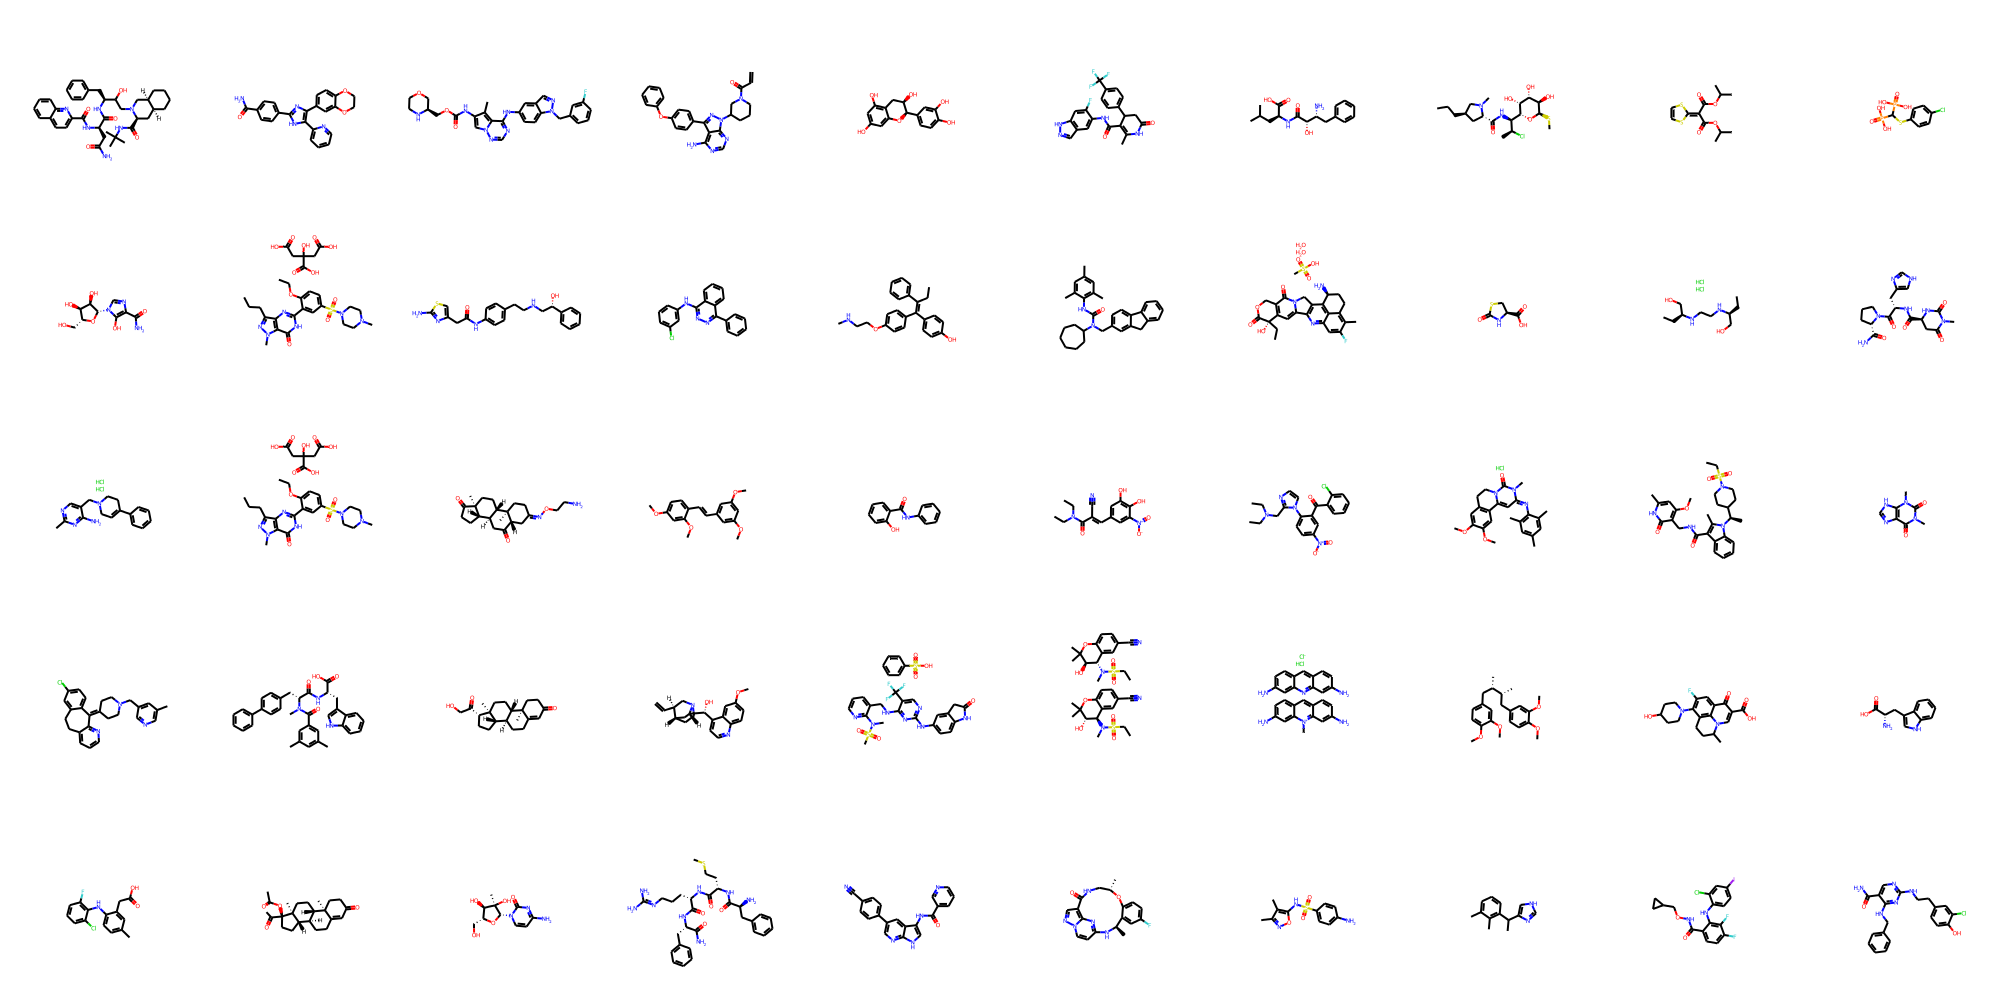

In [10612]:
smiles_list = [

'CC(C)(C)NC(=O)[C@@H]1C[C@@H]2CCCC[C@@H]2CN1CC(O)[C@H](Cc1ccccc1)NC(=O)[C@@H](CC(N)=O)NC(=O)c1ccc2ccccc2n1',
'NC(=O)c1ccc(-c2nc(-c3ccc4c(c3)OCCO4)c(-c3ccccn3)[nH]2)cc1',
'Cc1c(NC(=O)OC[C@@H]2COCCN2)cn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12',
'C=CC(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1',
'Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2',
'CC1=C(C(=O)Nc2cc3cn[nH]c3cc2F)C(c2ccc(C(F)(F)F)cc2)CC(=O)N1',
'CC(C)C[C@H](NC(=O)[C@@H](O)[C@H](N)Cc1ccccc1)C(=O)O',
'CCC[C@@H]1C[C@@H](C(=O)N[C@H]([C@H](C)Cl)[C@H]2O[C@H](SC)[C@H](O)[C@@H](O)[C@H]2O)N(C)C1',
'CC(C)OC(=O)C(C(=O)OC(C)C)=C1SC=CS1',
'O=P(O)(O)C(Sc1ccc(Cl)cc1)P(=O)(O)O',
'NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c1O',
'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12.O=C(O)CC(O)(CC(=O)O)C(=O)O',
'Nc1nc(CC(=O)Nc2ccc(CCNC[C@H](O)c3ccccc3)cc2)cs1',
'Clc1cccc(Nc2nnc(-c3ccccc3)c3ccccc23)c1',
'CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1',
'Cc1cc(C)c(NC(=O)N(Cc2ccc3c(c2)Cc2ccccc2-3)C2CCCCCC2)c(C)c1',
'CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2c-1nc1cc(F)c(C)c3c1c2[C@@H](N)CC3.CS(=O)(=O)O.O.O',
'O=C1N[C@H](C(=O)O)CS1',
'CC[C@@H](CO)NCCN[C@@H](CC)CO.Cl.Cl',
'CN1C(=O)C[C@@H](C(=O)N[C@@H](Cc2c[nH]cn2)C(=O)N2CCC[C@H]2C(N)=O)NC1=O',
'Cc1ncc(CN2CC=C(c3ccccc3)CC2)c(N)n1.Cl.Cl',
'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12.O=C(O)CC(O)(CC(=O)O)C(=O)O',
'C[C@]12CC[C@H]3[C@@H](CC(=O)[C@H]4C/C(=N/OCCN)CC[C@@]43C)[C@@H]1CCC2=O',
'COc1cc(/C=C/c2ccc(OC)cc2OC)cc(OC)c1',
'O=C(Nc1ccccc1)c1ccccc1O',
'CCN(CC)C(=O)/C(C#N)=C/c1cc(O)c(O)c([N+](=O)[O-])c1',
'CCN(CC)Cc1nccn1-c1ccc([N+](=O)[O-])cc1C(=O)c1ccccc1Cl',
'COc1cc2c(cc1OC)-c1c/c(=N\c3c(C)cc(C)cc3C)n(C)c(=O)n1CC2.Cl',
'CCS(=O)(=O)N1CCC([C@@H](C)n2c(C)c(C(=O)NCc3c(OC)cc(C)[nH]c3=O)c3ccccc32)CC1',
'Cn1c(=O)c2nc[nH]c2n(C)c1=O',
'Cc1cncc(CN2CCC(=C3c4ccc(Cl)cc4CCc4cccnc43)CC2)c1',
'Cc1cc(C)cc(C(=O)N(C)[C@H](Cc2ccc(-c3ccccc3)cc2)C(=O)N[C@@H](Cc2c[nH]c3ccccc23)C(=O)O)c1',
'C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C@@H]1CC[C@@H]2C(=O)CO',
'C=C[C@H]1CN2CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12',
'CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F)(F)F)S(C)(=O)=O.O=S(=O)(O)c1ccccc1',
'CCS(=O)(=O)N(C)[C@@H]1c2cc(C#N)ccc2OC(C)(C)[C@H]1O.CCS(=O)(=O)N(C)[C@H]1c2cc(C#N)ccc2OC(C)(C)[C@@H]1O',
'C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.Cl.Nc1ccc2cc3ccc(N)cc3nc2c1.[Cl-]',
'COc1ccc(C[C@H](C)[C@H](C)Cc2ccc(OC)c(OC)c2)cc1OC',
'CC1CCc2c(N3CCC(O)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23',
'N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O',
'Cc1ccc(Nc2c(F)cccc2Cl)c(CC(=O)O)c1',
'CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C',
'C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n1ccc(N)nc1=O',
'CSCC[C@H](NC(=O)[C@@H](N)Cc1ccccc1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](Cc1ccccc1)C(N)=O',
'N#Cc1ccc(-c2cnc3[nH]cc(NC(=O)c4cccnc4)c3c2)cc1',
'C[C@H]1CNC(=O)c2cnn3ccc(nc23)N[C@H](C)c2cc(F)ccc2O1',
'Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C',
'Cc1cccc(C(C)c2c[nH]cn2)c1C',
'O=C(NOCC1CC1)c1ccc(F)c(F)c1Nc1ccc(I)cc1Cl',
'NC(=O)c1cnc(NCCc2ccc(O)c(Cl)c2)nc1NCc1ccccc1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



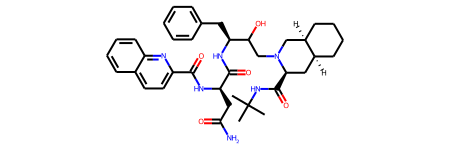

In [10613]:
M1 = mol_list [0]
M1

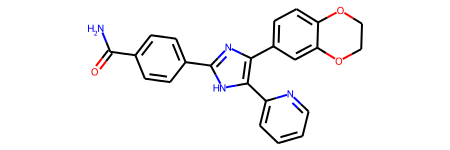

In [10614]:
M2 = mol_list [1]
M2

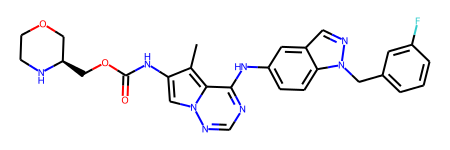

In [10615]:
M3 = mol_list [2]
M3

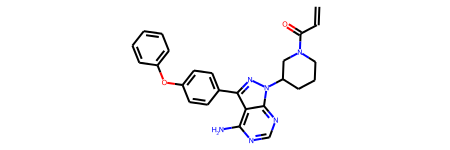

In [10616]:
M4 = mol_list [3]
M4

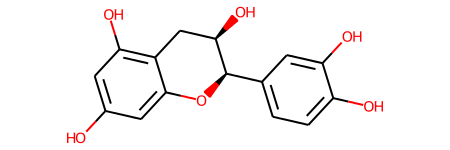

In [10617]:
M5 = mol_list [4]
M5

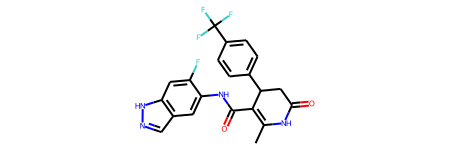

In [10618]:
M6 = mol_list [5]
M6

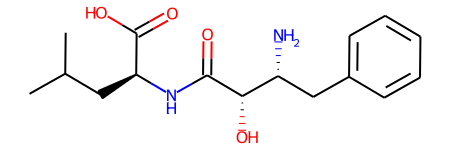

In [10619]:
M7 = mol_list [6]
M7

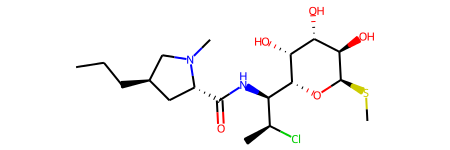

In [10620]:
M8 = mol_list [7]
M8

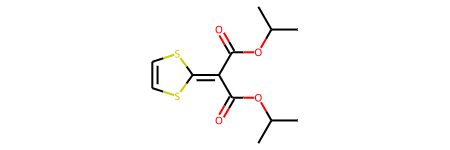

In [10621]:
M9 = mol_list [8]
M9

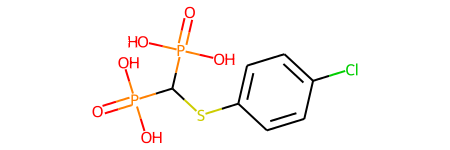

In [10622]:
M10 = mol_list [9]
M10

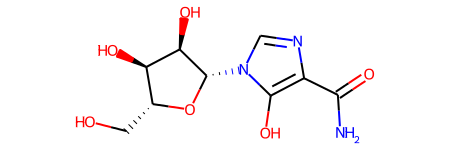

In [10623]:
M11 = mol_list [10]
M11

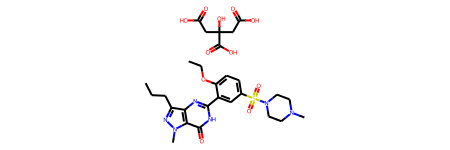

In [10624]:
M12 = mol_list [11]
M12

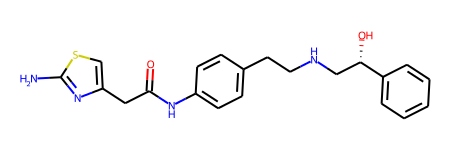

In [10625]:
M13 = mol_list [12]
M13

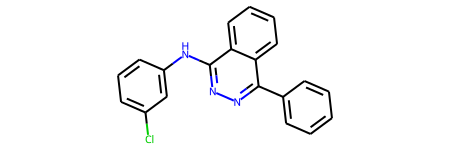

In [10626]:
M14 = mol_list [13]
M14

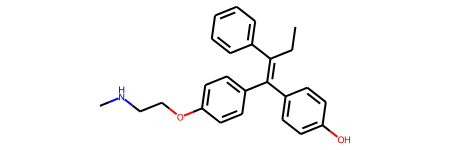

In [10627]:
M15 = mol_list [14]
M15

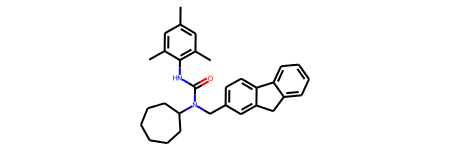

In [10628]:
M16 = mol_list [15]
M16

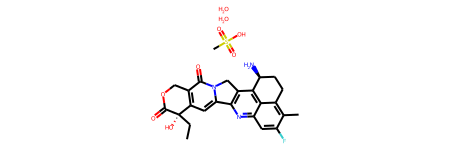

In [10629]:
M17 = mol_list [16]
M17

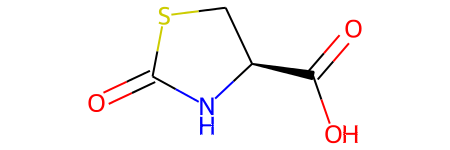

In [10630]:
M18 = mol_list [17]
M18

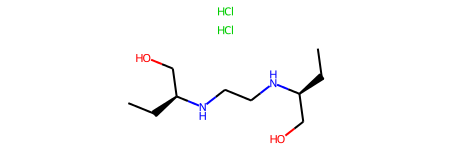

In [10631]:
M19 = mol_list [18]
M19

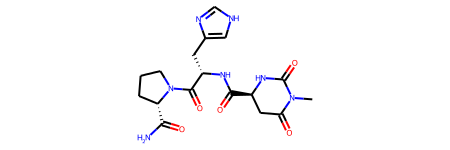

In [10632]:
M20 = mol_list [19]
M20

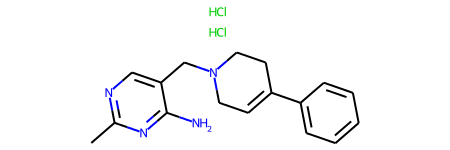

In [10633]:
M21 = mol_list [20]
M21

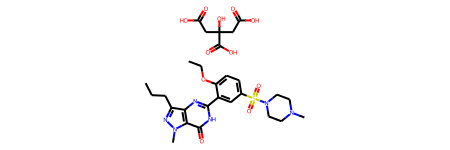

In [10634]:
M22 = mol_list [21]
M22

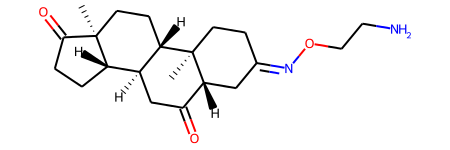

In [10635]:
M23 = mol_list [22]
M23

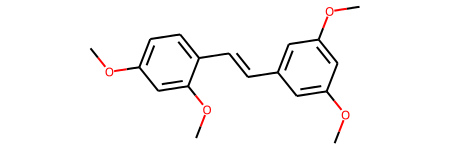

In [10636]:
M24 = mol_list [23]
M24

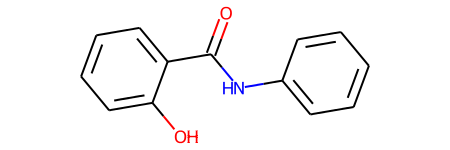

In [10637]:
M25 = mol_list [24]
M25

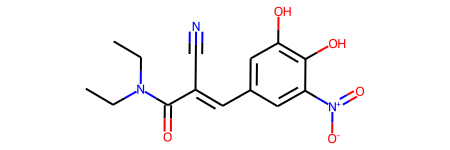

In [10638]:
M26 = mol_list [25]
M26

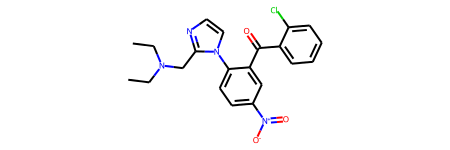

In [10639]:
M27 = mol_list [26]
M27

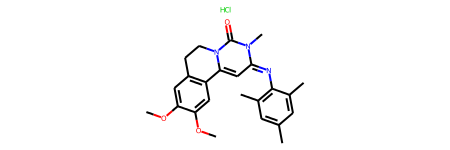

In [10640]:
M28 = mol_list [27]
M28

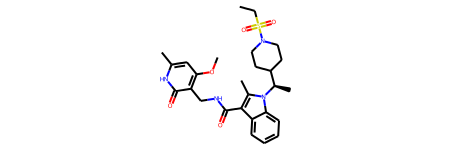

In [10641]:
M29 = mol_list [28]
M29

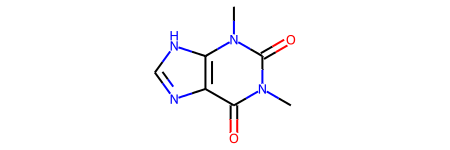

In [10642]:
M30 = mol_list [29]
M30

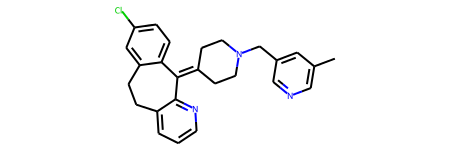

In [10643]:
M31 = mol_list [30]
M31

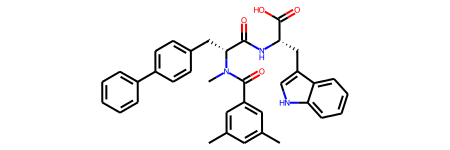

In [10644]:
M32 = mol_list [31]
M32

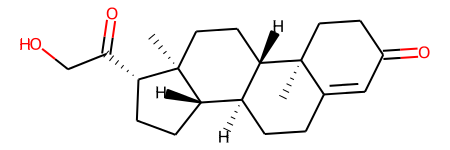

In [10645]:
M33 = mol_list [32]
M33

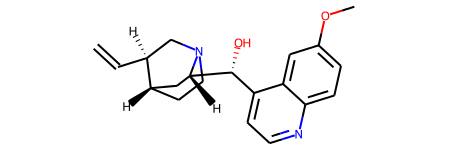

In [10646]:
M34 = mol_list [33]
M34

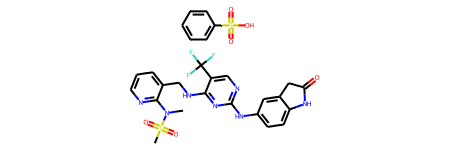

In [10647]:
M35 = mol_list [34]
M35

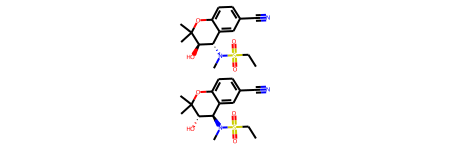

In [10648]:
M36 = mol_list [35]
M36

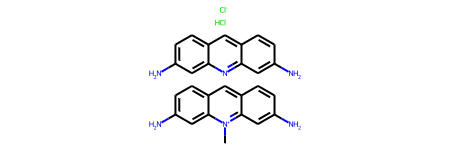

In [10649]:
M37= mol_list [36]
M37

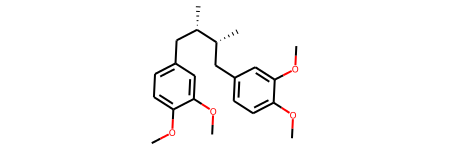

In [10650]:
M38= mol_list [37]
M38

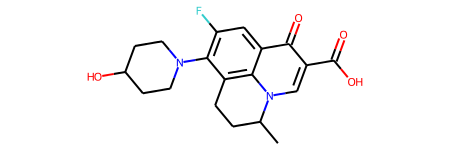

In [10651]:
M39= mol_list [38]
M39

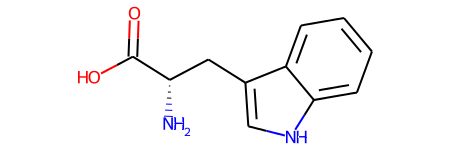

In [10652]:
M40= mol_list [39]
M40

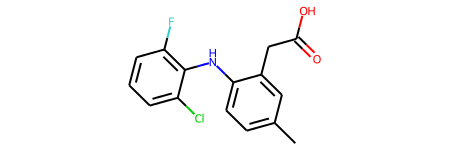

In [10653]:
M41= mol_list [40]
M41

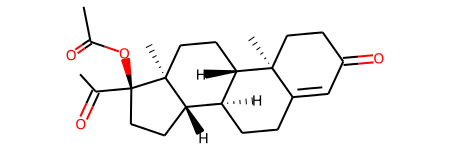

In [10654]:
M42= mol_list [41]
M42

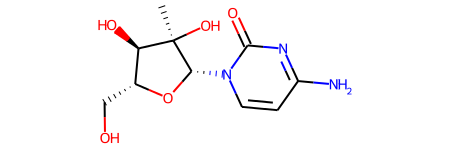

In [10655]:
M43= mol_list [42]
M43

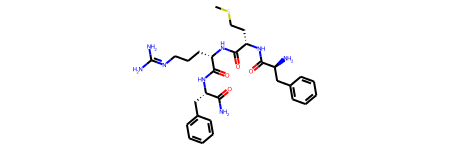

In [10656]:
M44= mol_list [43]
M44

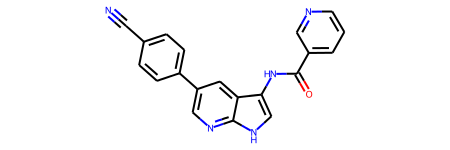

In [10657]:
M45= mol_list [44]
M45

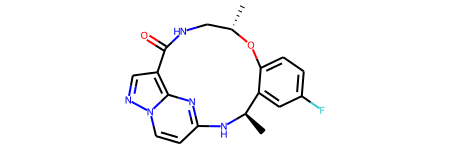

In [10658]:
M46= mol_list [45]
M46

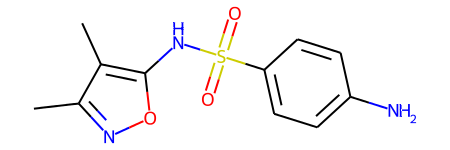

In [10659]:
M47= mol_list [46]
M47

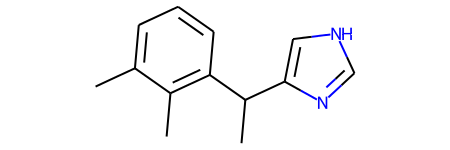

In [10660]:
M48= mol_list [47]
M48

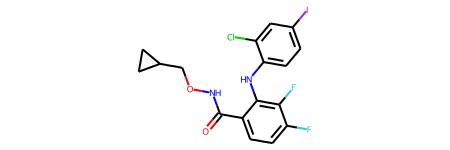

In [10661]:
M49= mol_list [48]
M49

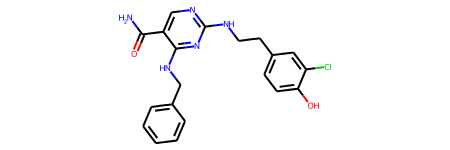

In [10662]:
M50= mol_list [49]
M50

In [10663]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 4,
 33,
 42,
 50,
 63,
 64,
 73,
 79,
 80,
 86,
 104,
 114,
 117,
 128,
 140,
 147,
 154,
 159,
 163,
 175,
 179,
 203,
 227,
 263,
 266,
 268,
 276,
 289,
 301,
 306,
 354,
 356,
 375,
 376,
 378,
 389,
 392,
 411,
 447,
 476,
 486,
 531,
 539,
 573,
 585,
 587,
 603,
 612,
 636,
 650,
 658,
 689,
 726,
 730,
 736,
 739,
 747,
 807,
 831,
 837,
 847,
 849,
 855,
 857,
 874,
 876,
 888,
 890,
 893,
 898,
 926,
 927,
 935,
 953,
 998,
 1019]

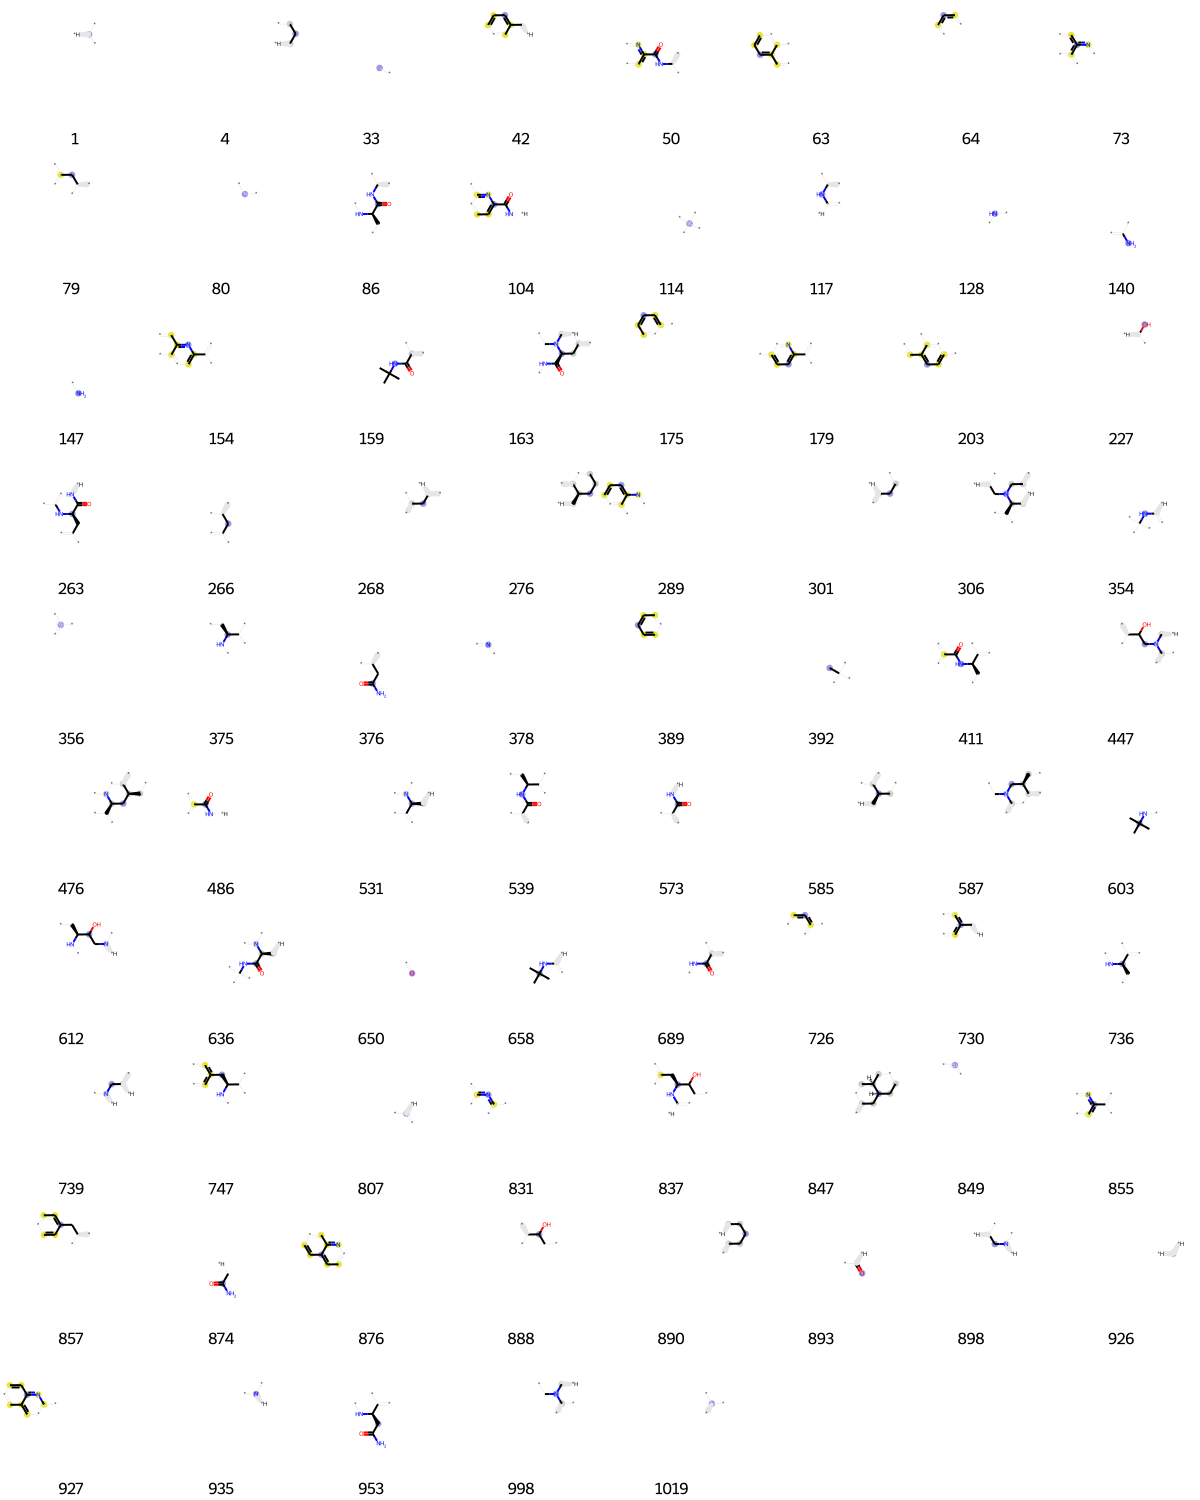

In [10664]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [10665]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[11,
 32,
 64,
 90,
 119,
 131,
 136,
 140,
 147,
 155,
 160,
 175,
 194,
 256,
 309,
 323,
 340,
 356,
 361,
 378,
 428,
 430,
 432,
 441,
 448,
 505,
 585,
 623,
 650,
 656,
 673,
 674,
 703,
 721,
 726,
 738,
 807,
 827,
 831,
 836,
 842,
 849,
 875,
 881,
 893,
 896,
 926,
 950,
 961,
 980]

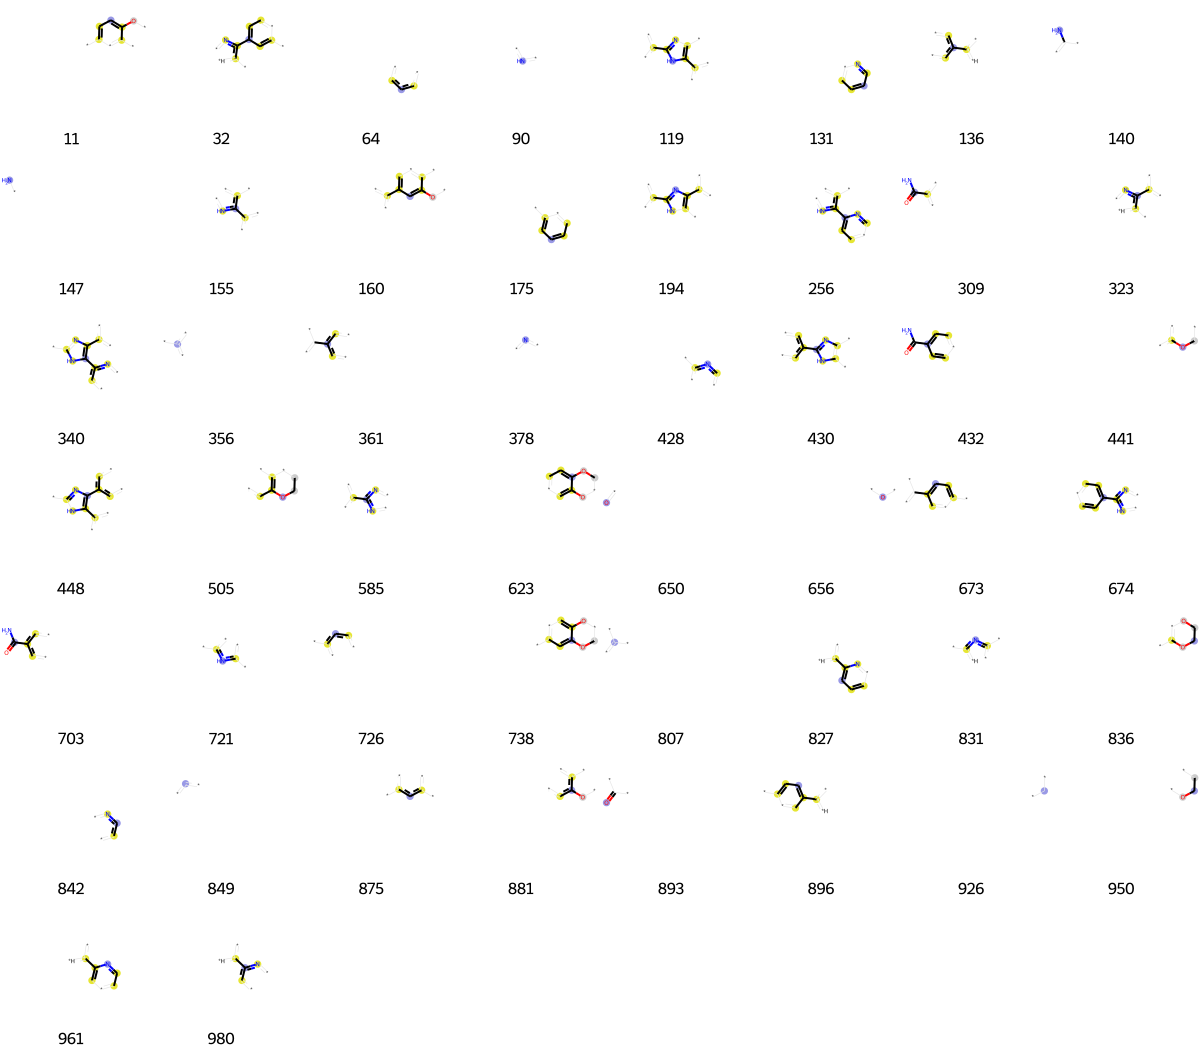

In [10666]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [10667]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[3,
 15,
 33,
 42,
 43,
 45,
 50,
 64,
 72,
 80,
 81,
 82,
 85,
 90,
 96,
 112,
 122,
 128,
 147,
 158,
 168,
 181,
 191,
 192,
 195,
 197,
 200,
 230,
 252,
 302,
 305,
 329,
 343,
 353,
 356,
 365,
 378,
 397,
 405,
 416,
 422,
 428,
 463,
 464,
 483,
 489,
 491,
 511,
 523,
 572,
 616,
 646,
 650,
 656,
 695,
 698,
 699,
 708,
 709,
 720,
 726,
 730,
 734,
 741,
 744,
 792,
 807,
 817,
 831,
 843,
 849,
 875,
 888,
 893,
 899,
 902,
 904,
 926,
 935,
 950,
 997,
 1013,
 1019,
 1022]

In [10668]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[16,
 64,
 117,
 157,
 167,
 188,
 231,
 233,
 255,
 315,
 356,
 361,
 363,
 416,
 451,
 496,
 513,
 578,
 583,
 589,
 648,
 656,
 726,
 745,
 750,
 751,
 779,
 807,
 849,
 858,
 875,
 881,
 926,
 1019]

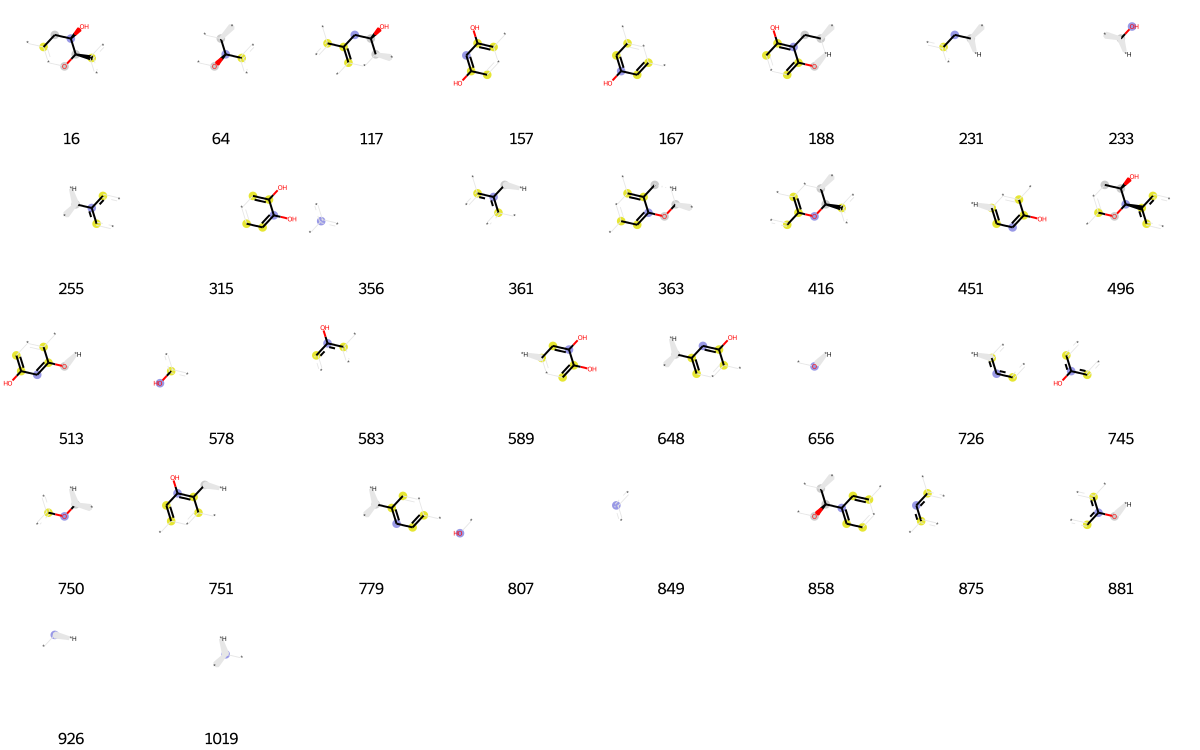

In [10669]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [10670]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 36,
 55,
 74,
 90,
 96,
 114,
 119,
 128,
 189,
 200,
 208,
 231,
 236,
 248,
 253,
 255,
 272,
 314,
 356,
 378,
 383,
 393,
 420,
 429,
 440,
 476,
 486,
 511,
 551,
 582,
 599,
 600,
 609,
 627,
 641,
 650,
 654,
 663,
 666,
 698,
 699,
 726,
 779,
 792,
 807,
 809,
 816,
 831,
 849,
 875,
 891,
 893,
 904,
 924,
 926,
 947,
 1019]

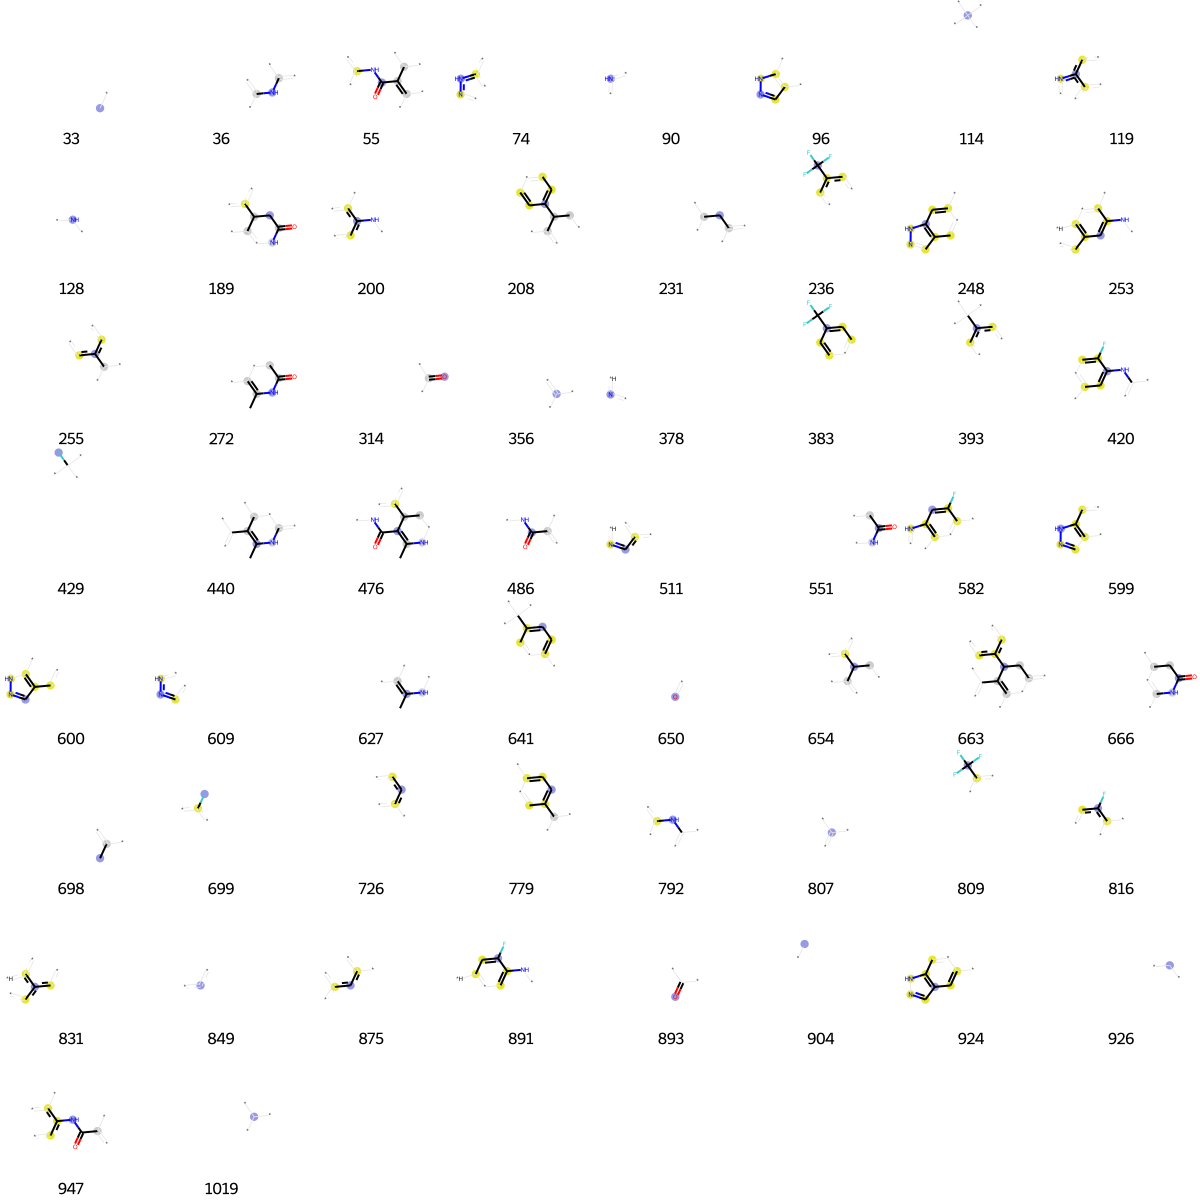

In [10671]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [10672]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 33,
 42,
 50,
 64,
 79,
 80,
 117,
 128,
 147,
 175,
 180,
 227,
 283,
 356,
 387,
 389,
 458,
 510,
 573,
 600,
 650,
 680,
 726,
 730,
 736,
 759,
 786,
 807,
 820,
 823,
 849,
 857,
 893,
 921,
 977,
 992]

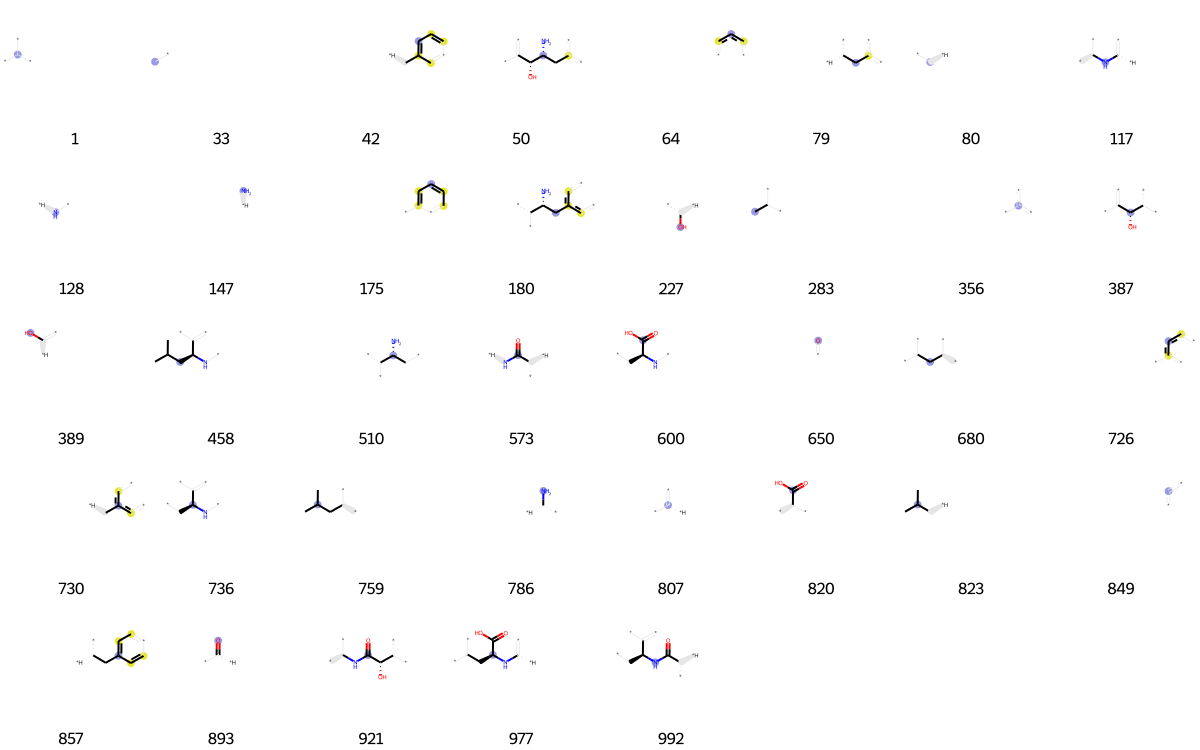

In [10673]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [10674]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 13,
 29,
 33,
 35,
 65,
 80,
 116,
 117,
 121,
 128,
 143,
 175,
 193,
 233,
 243,
 268,
 283,
 294,
 298,
 346,
 368,
 388,
 394,
 403,
 428,
 433,
 442,
 463,
 486,
 493,
 531,
 573,
 607,
 650,
 656,
 659,
 689,
 739,
 794,
 796,
 807,
 832,
 893,
 895,
 897,
 914,
 926,
 935,
 1017,
 1019,
 1020]

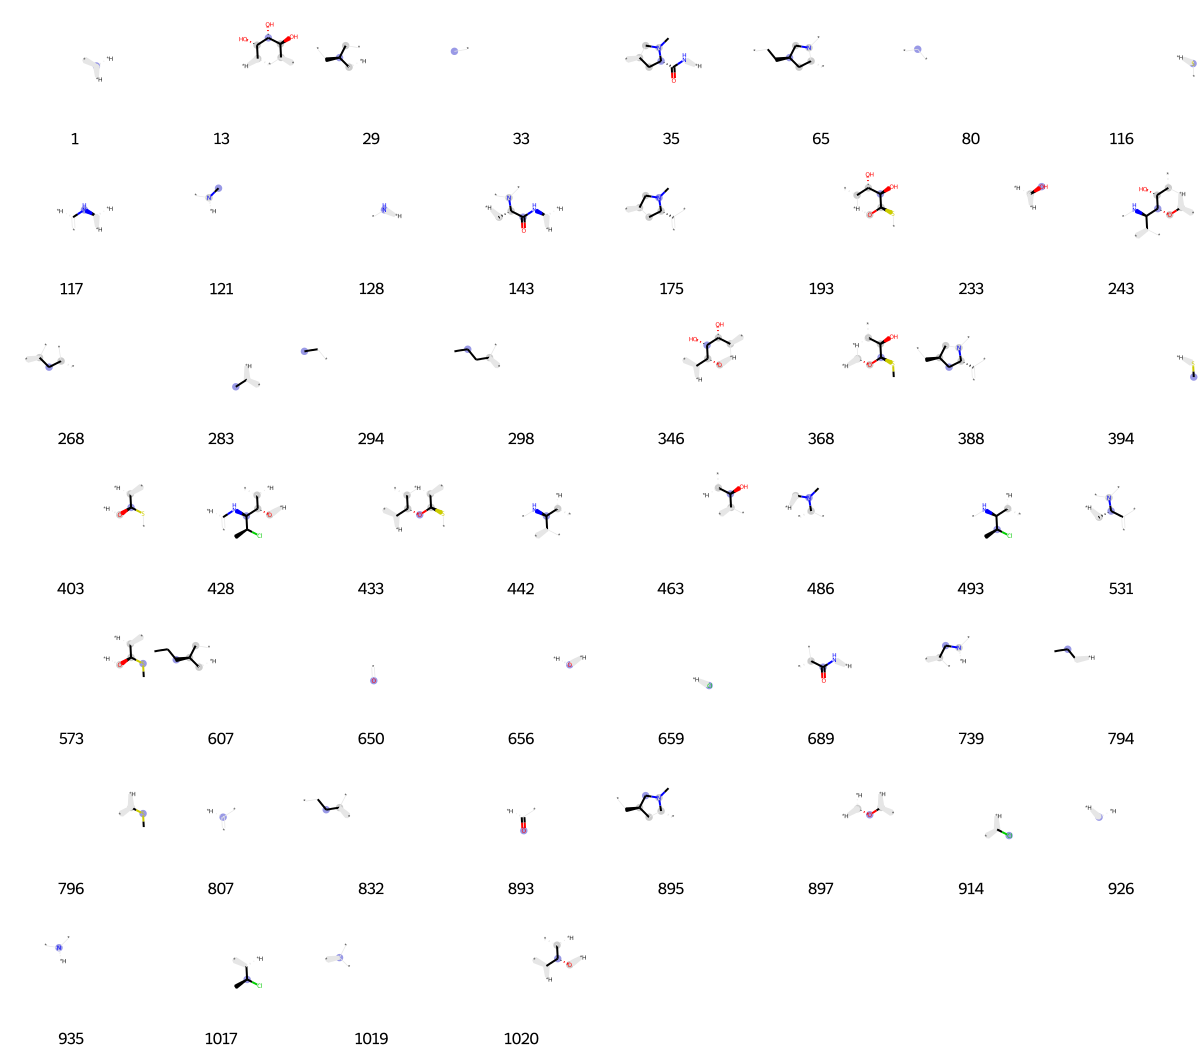

In [10675]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [10676]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 33,
 69,
 166,
 177,
 260,
 261,
 283,
 356,
 367,
 368,
 387,
 537,
 585,
 629,
 650,
 675,
 695,
 720,
 807,
 849,
 893,
 954]

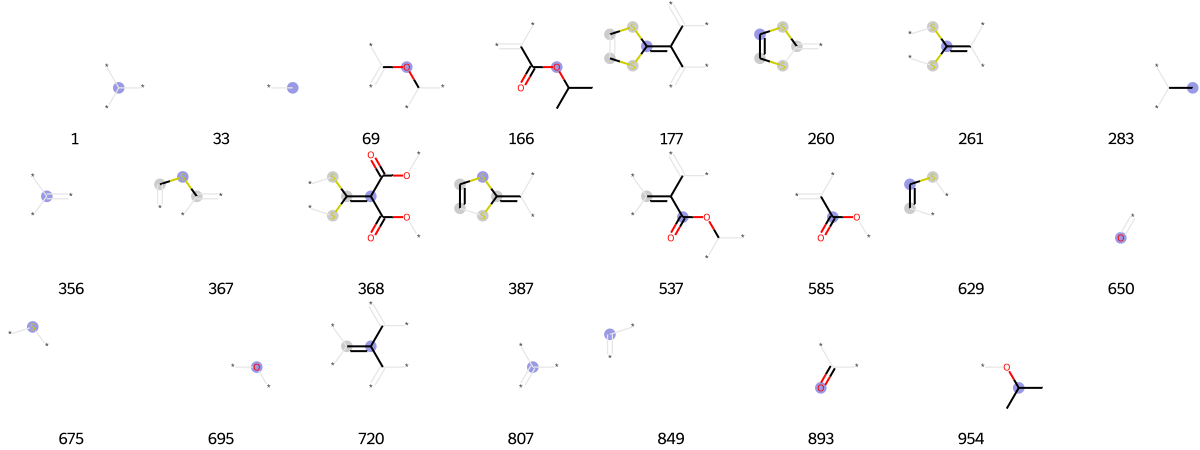

In [10677]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [10678]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[1,
 46,
 116,
 155,
 192,
 216,
 231,
 353,
 356,
 483,
 486,
 561,
 605,
 650,
 659,
 683,
 726,
 807,
 811,
 814,
 816,
 842,
 849,
 919]

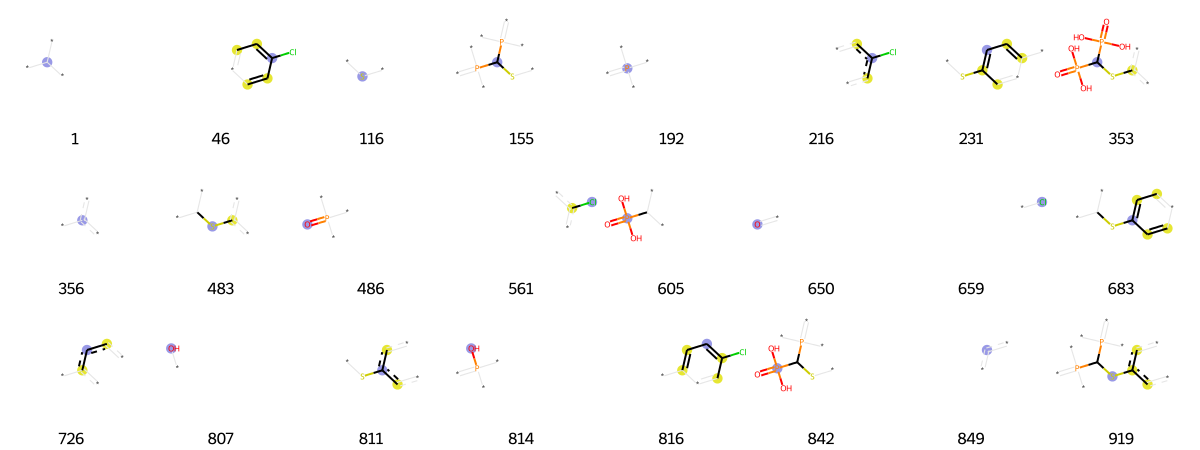

In [10679]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [10680]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[75,
 80,
 114,
 140,
 147,
 152,
 194,
 210,
 221,
 222,
 233,
 309,
 345,
 356,
 378,
 428,
 454,
 463,
 490,
 492,
 501,
 574,
 577,
 578,
 610,
 650,
 656,
 740,
 798,
 807,
 820,
 849,
 893,
 897,
 932,
 935,
 1019]

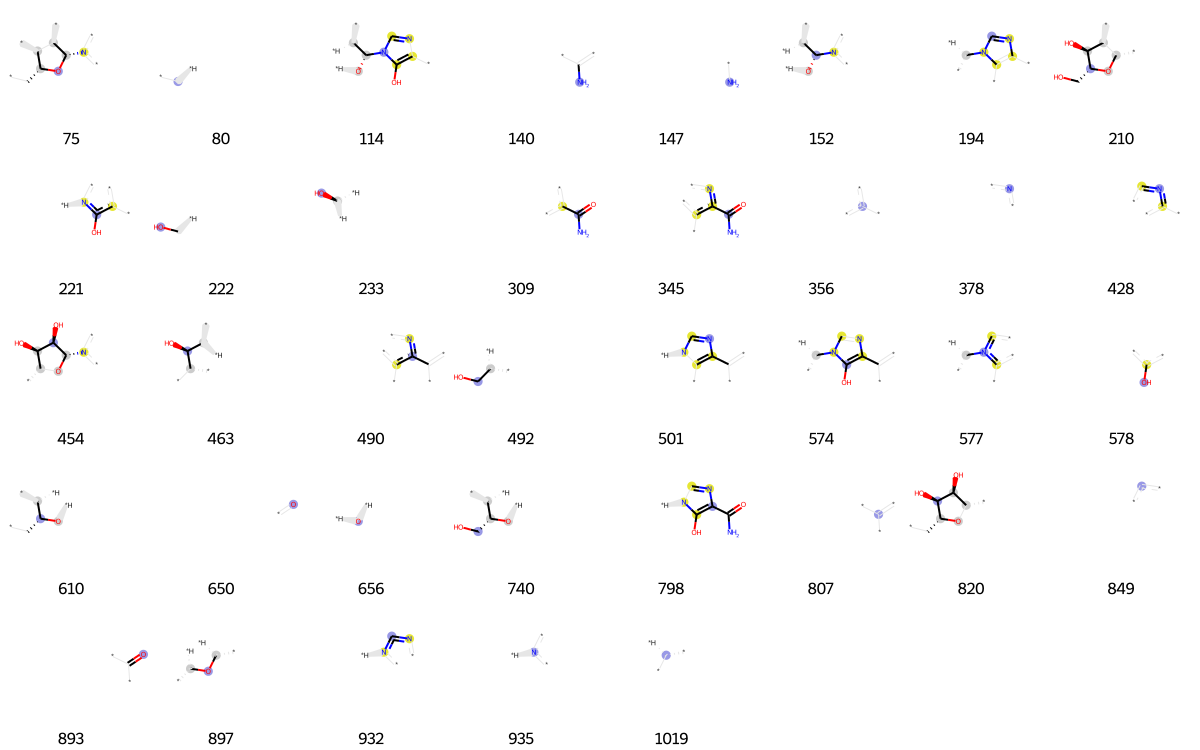

In [10681]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [10682]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[14,
 33,
 37,
 73,
 80,
 81,
 90,
 94,
 113,
 114,
 121,
 207,
 212,
 214,
 219,
 237,
 268,
 271,
 294,
 314,
 319,
 350,
 352,
 356,
 357,
 366,
 378,
 389,
 397,
 416,
 425,
 428,
 452,
 456,
 525,
 540,
 564,
 585,
 589,
 650,
 652,
 672,
 695,
 700,
 702,
 705,
 713,
 715,
 721,
 726,
 750,
 757,
 780,
 794,
 800,
 807,
 831,
 849,
 852,
 853,
 873,
 875,
 880,
 884,
 893,
 926,
 932,
 935,
 946,
 953,
 977,
 1005]

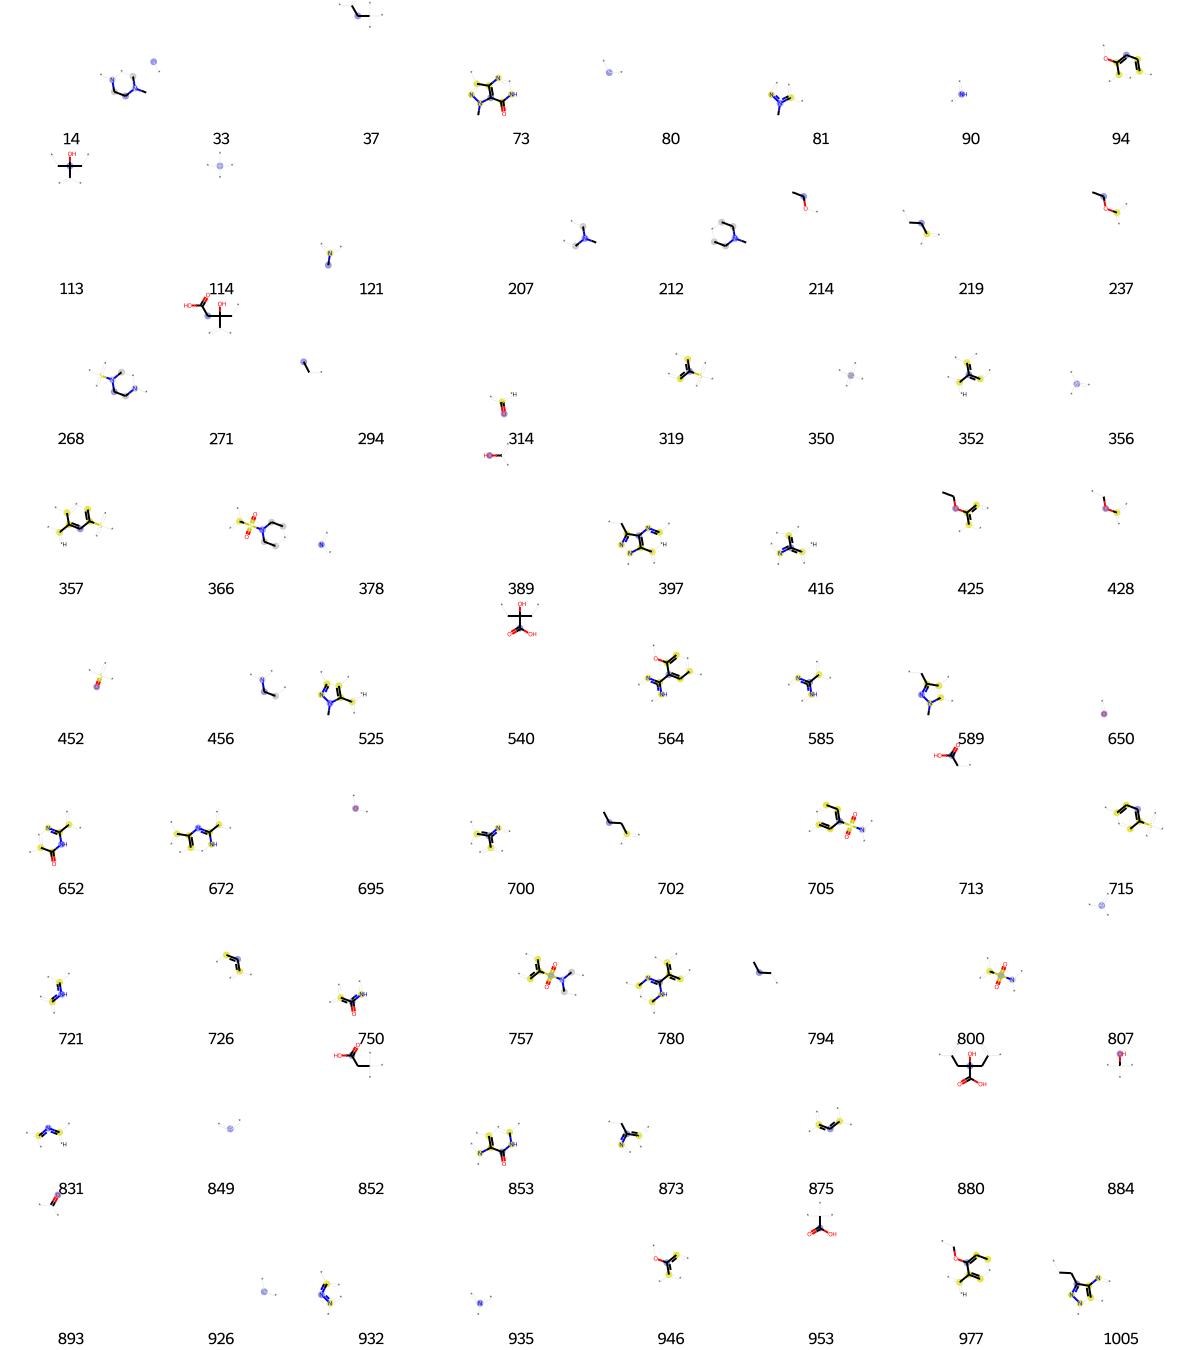

In [10683]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [10684]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 21,
 41,
 53,
 64,
 80,
 105,
 128,
 145,
 147,
 150,
 175,
 191,
 219,
 227,
 228,
 240,
 263,
 293,
 310,
 325,
 338,
 341,
 356,
 378,
 389,
 433,
 483,
 500,
 543,
 552,
 557,
 606,
 632,
 650,
 658,
 667,
 675,
 724,
 726,
 730,
 732,
 774,
 792,
 807,
 831,
 843,
 849,
 893,
 901,
 1004]

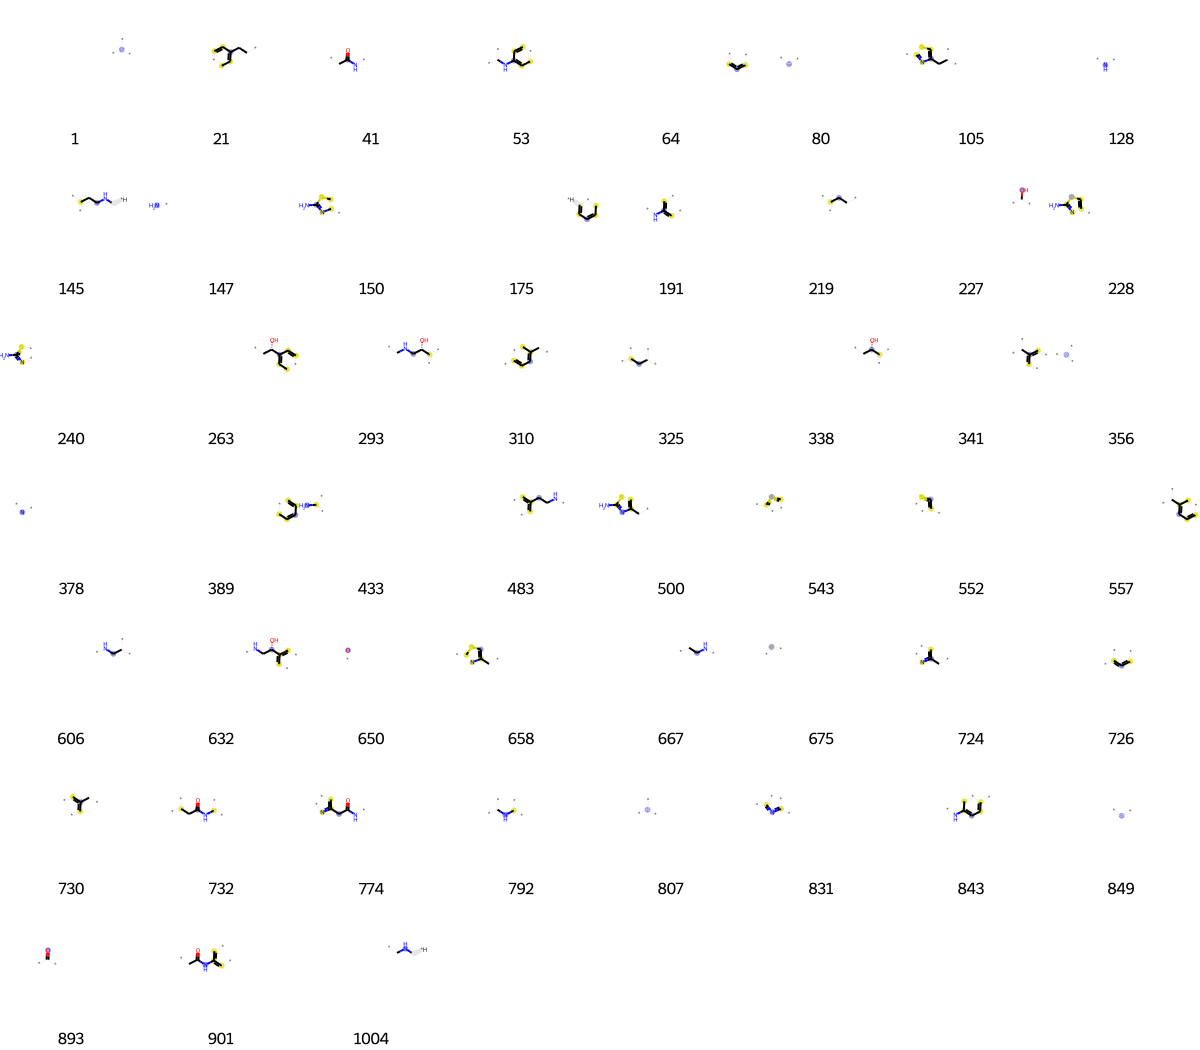

In [10685]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [10686]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[15,
 64,
 104,
 112,
 123,
 128,
 136,
 140,
 160,
 165,
 175,
 191,
 216,
 323,
 329,
 333,
 356,
 378,
 389,
 471,
 491,
 530,
 544,
 549,
 561,
 592,
 659,
 703,
 708,
 726,
 736,
 751,
 849,
 875,
 888]

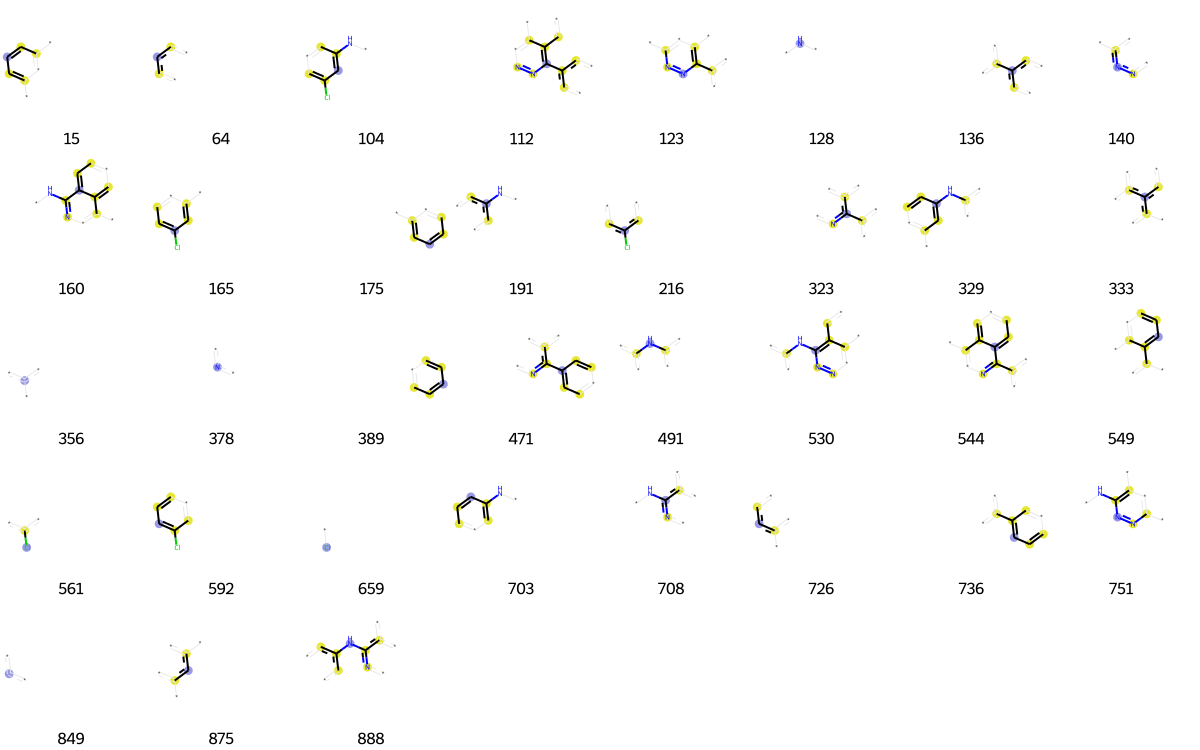

In [10687]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [10688]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[2,
 10,
 13,
 16,
 33,
 64,
 80,
 102,
 112,
 128,
 175,
 232,
 289,
 294,
 322,
 356,
 361,
 389,
 406,
 428,
 434,
 490,
 571,
 578,
 667,
 673,
 688,
 695,
 718,
 726,
 745,
 754,
 804,
 807,
 849,
 898,
 961,
 971]

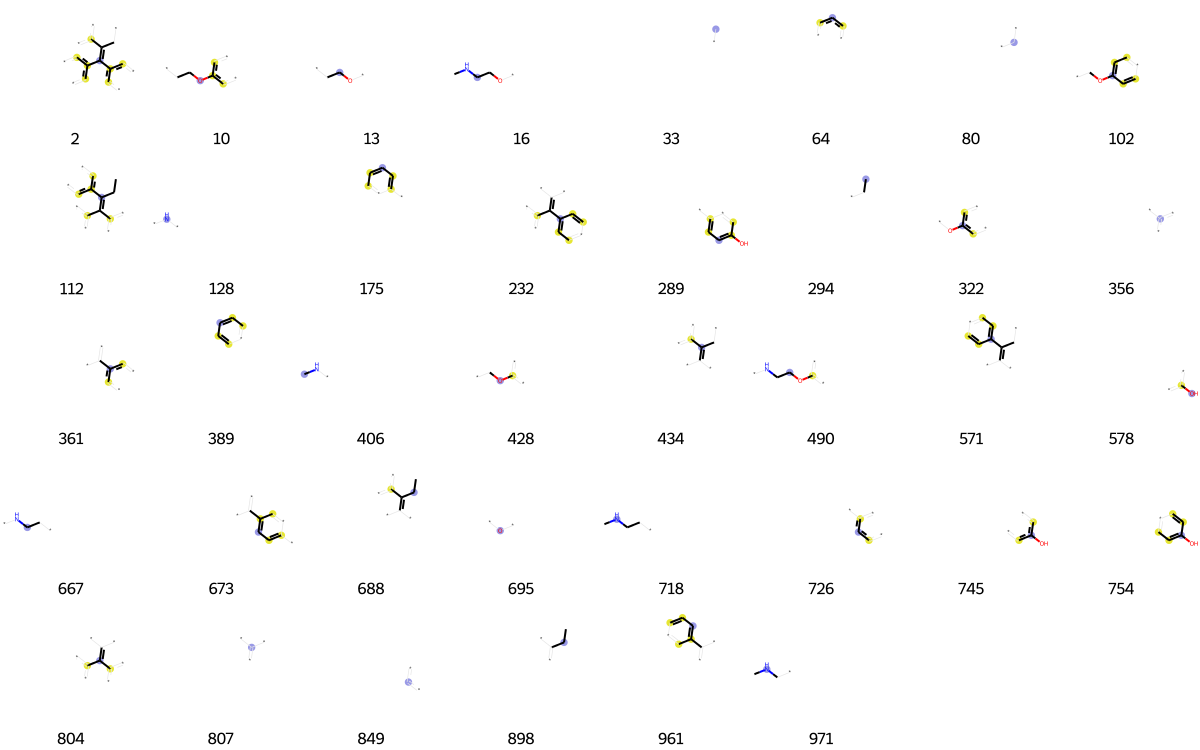

In [10689]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [10690]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[2,
 4,
 14,
 33,
 39,
 52,
 64,
 80,
 109,
 128,
 175,
 193,
 204,
 212,
 247,
 301,
 310,
 352,
 356,
 367,
 381,
 383,
 404,
 507,
 540,
 556,
 590,
 650,
 662,
 680,
 684,
 698,
 721,
 726,
 730,
 792,
 799,
 807,
 809,
 849,
 875,
 881,
 890,
 893,
 926,
 929,
 956,
 984,
 1005,
 1019]

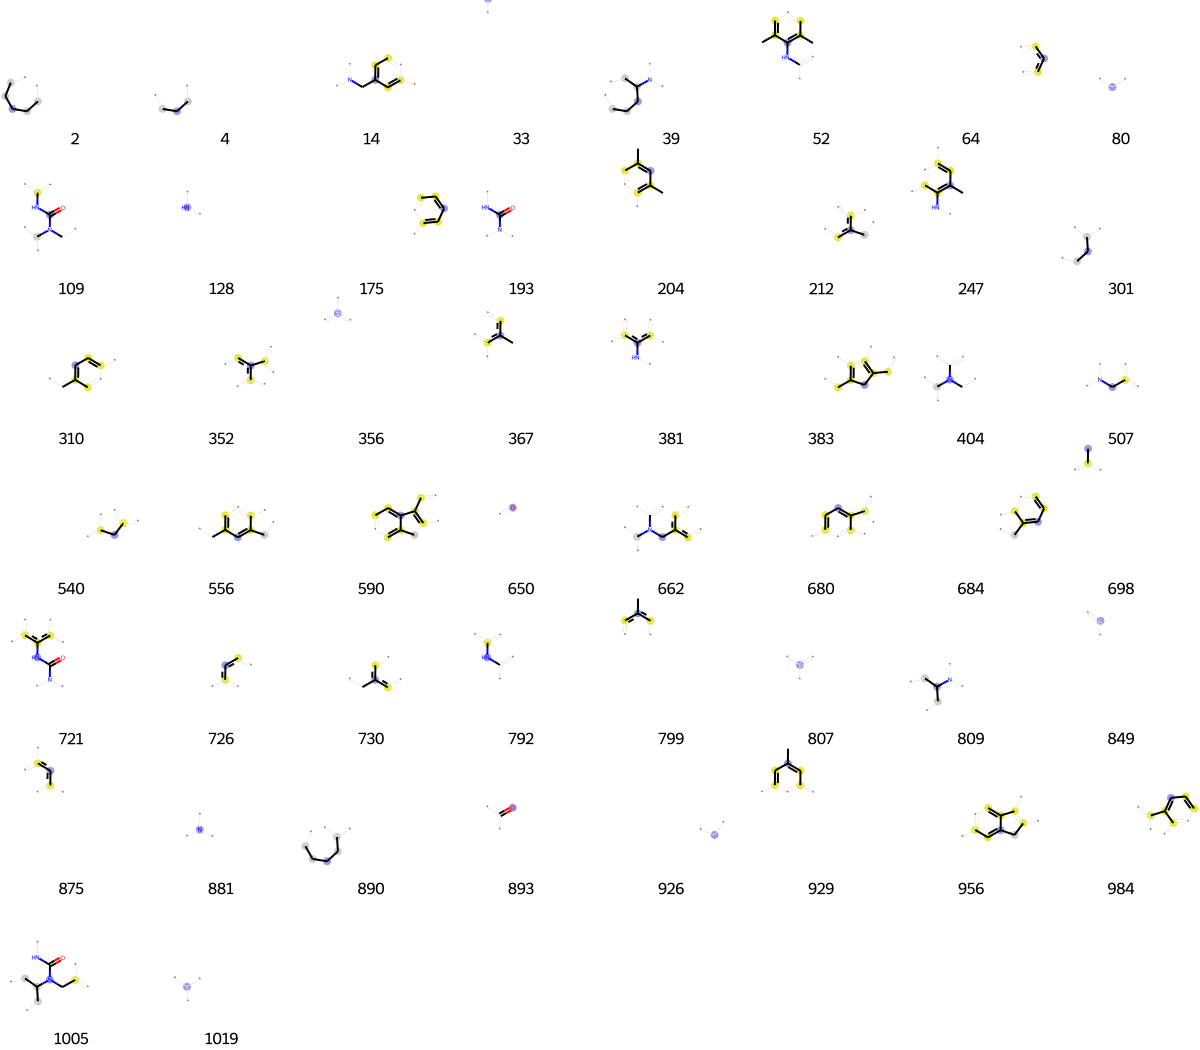

In [10691]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [10692]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[33,
 36,
 73,
 80,
 111,
 128,
 130,
 147,
 173,
 189,
 207,
 233,
 248,
 252,
 268,
 294,
 301,
 314,
 323,
 326,
 327,
 350,
 356,
 361,
 369,
 378,
 392,
 441,
 452,
 458,
 465,
 472,
 491,
 504,
 541,
 560,
 578,
 587,
 592,
 609,
 624,
 650,
 656,
 657,
 668,
 692,
 698,
 699,
 706,
 714,
 758,
 762,
 770,
 790,
 794,
 807,
 808,
 816,
 831,
 840,
 849,
 856,
 875,
 904,
 922,
 926,
 935,
 943,
 956,
 960,
 1011,
 1019]

In [10693]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[83,
 90,
 157,
 184,
 301,
 314,
 356,
 362,
 389,
 407,
 424,
 553,
 650,
 652,
 675,
 795,
 804,
 807,
 847,
 893,
 926,
 1019]

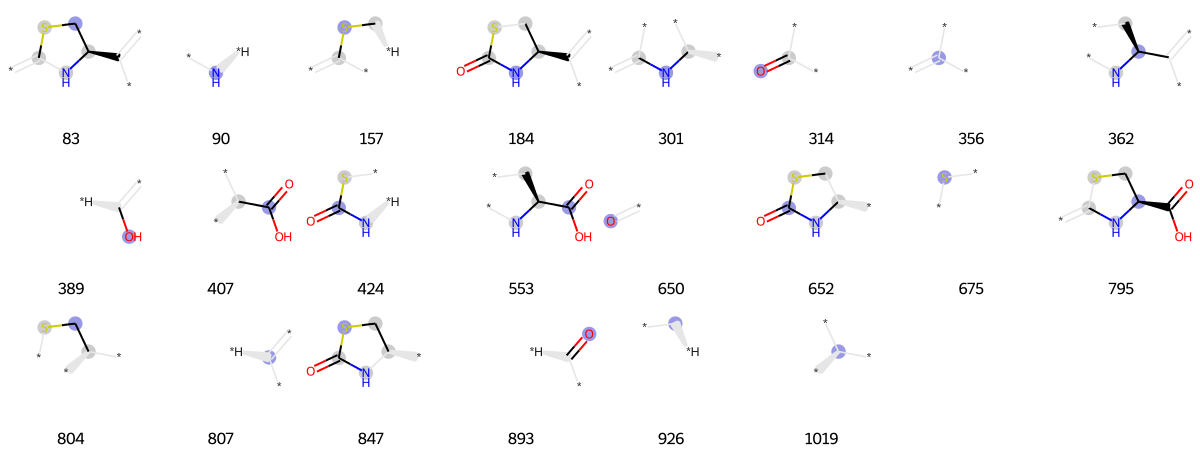

In [10694]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [10695]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 33,
 48,
 80,
 128,
 222,
 294,
 482,
 514,
 520,
 609,
 667,
 782,
 807,
 875,
 911,
 918,
 966]

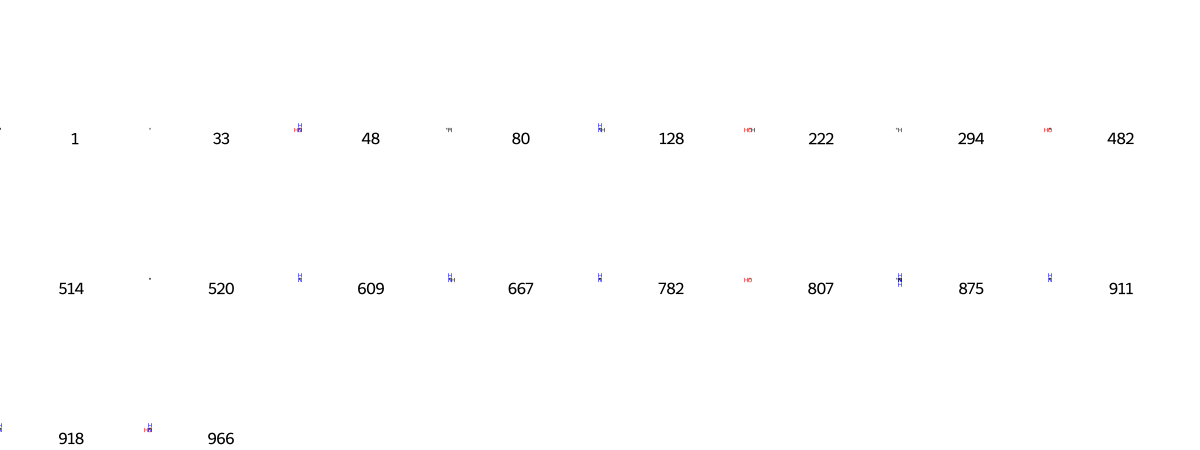

In [10696]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [10697]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 4,
 21,
 33,
 79,
 80,
 90,
 108,
 117,
 121,
 128,
 140,
 147,
 193,
 231,
 242,
 282,
 301,
 314,
 320,
 354,
 356,
 362,
 378,
 401,
 405,
 409,
 411,
 428,
 446,
 456,
 457,
 488,
 531,
 555,
 564,
 575,
 600,
 609,
 625,
 650,
 652,
 689,
 713,
 724,
 734,
 736,
 798,
 807,
 837,
 849,
 855,
 893,
 926,
 931,
 935,
 987,
 1019]

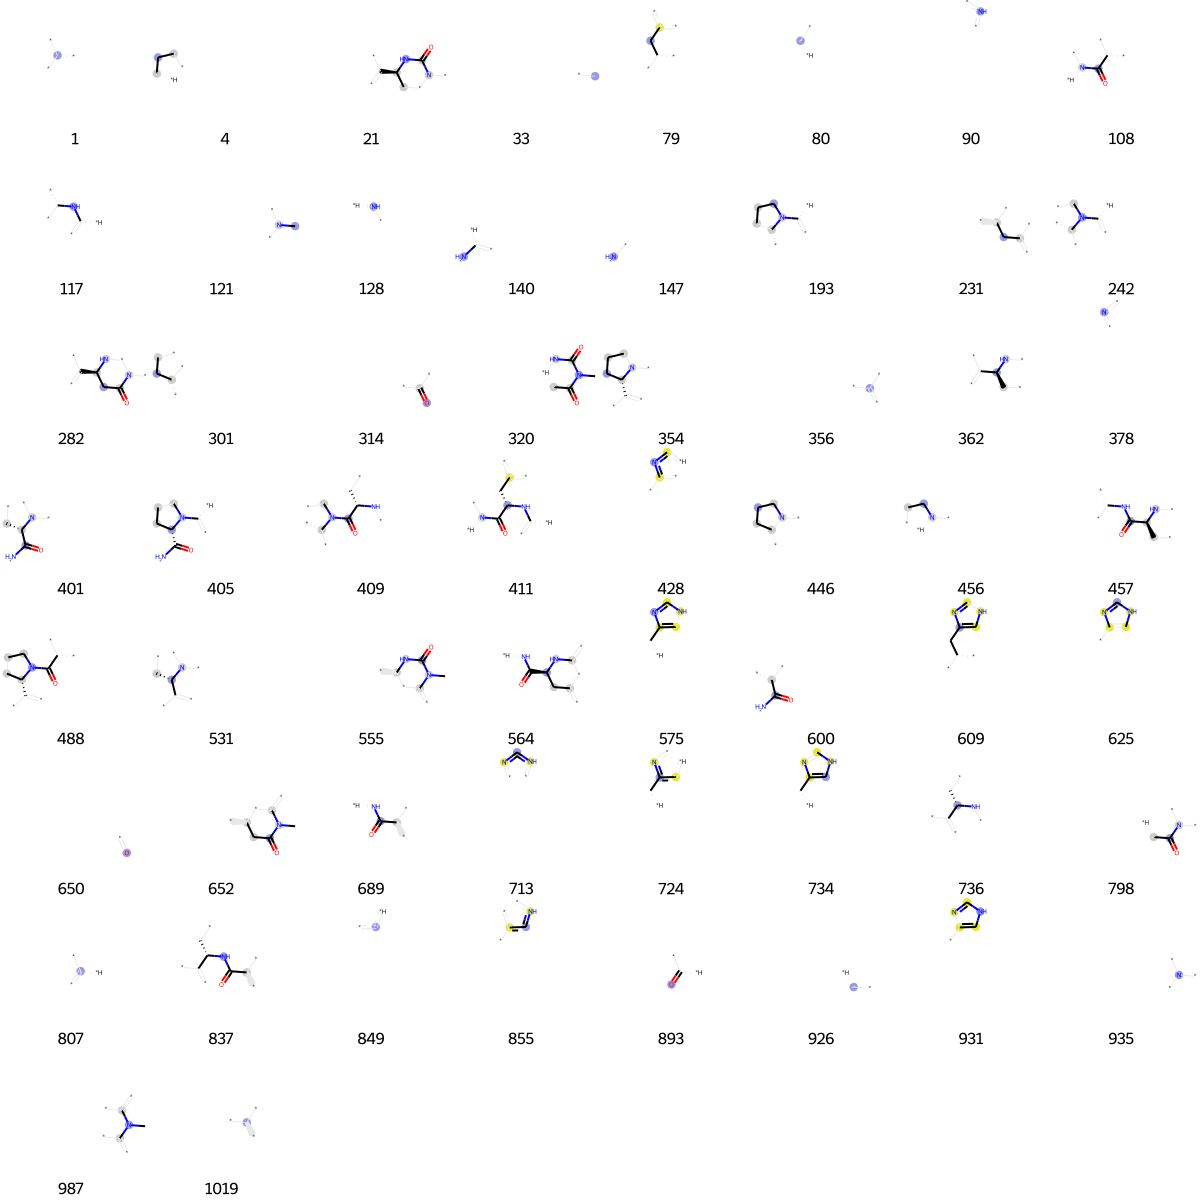

In [10698]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [10699]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 44,
 64,
 79,
 80,
 102,
 136,
 147,
 175,
 284,
 296,
 309,
 325,
 356,
 378,
 389,
 428,
 429,
 433,
 435,
 456,
 502,
 511,
 514,
 516,
 521,
 637,
 690,
 698,
 714,
 726,
 736,
 741,
 757,
 762,
 767,
 768,
 799,
 831,
 840,
 849,
 926,
 935]

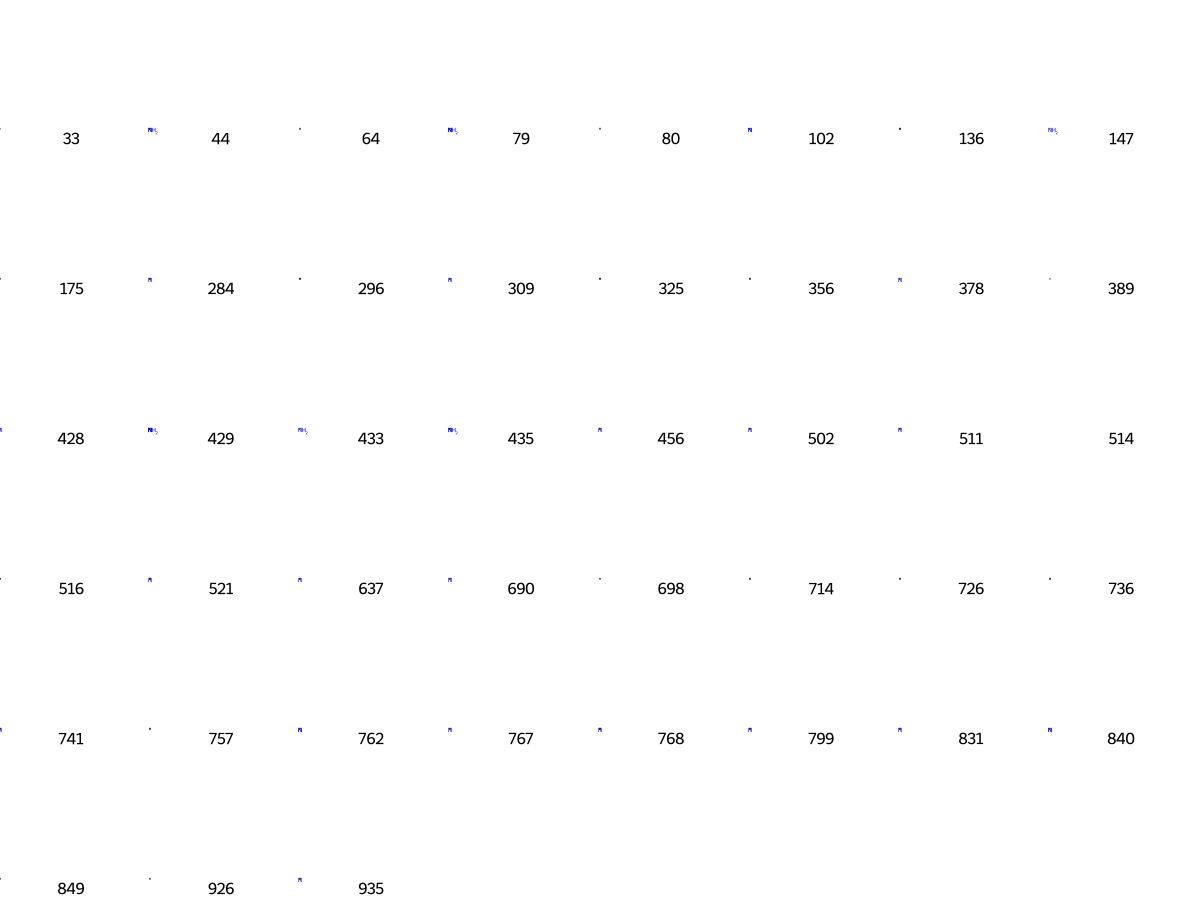

In [10700]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [10701]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[14,
 33,
 37,
 73,
 80,
 81,
 90,
 94,
 113,
 114,
 121,
 207,
 212,
 214,
 219,
 237,
 268,
 271,
 294,
 314,
 319,
 350,
 352,
 356,
 357,
 366,
 378,
 389,
 397,
 416,
 425,
 428,
 452,
 456,
 525,
 540,
 564,
 585,
 589,
 650,
 652,
 672,
 695,
 700,
 702,
 705,
 713,
 715,
 721,
 726,
 750,
 757,
 780,
 794,
 800,
 807,
 831,
 849,
 852,
 853,
 873,
 875,
 880,
 884,
 893,
 926,
 932,
 935,
 946,
 953,
 977,
 1005]

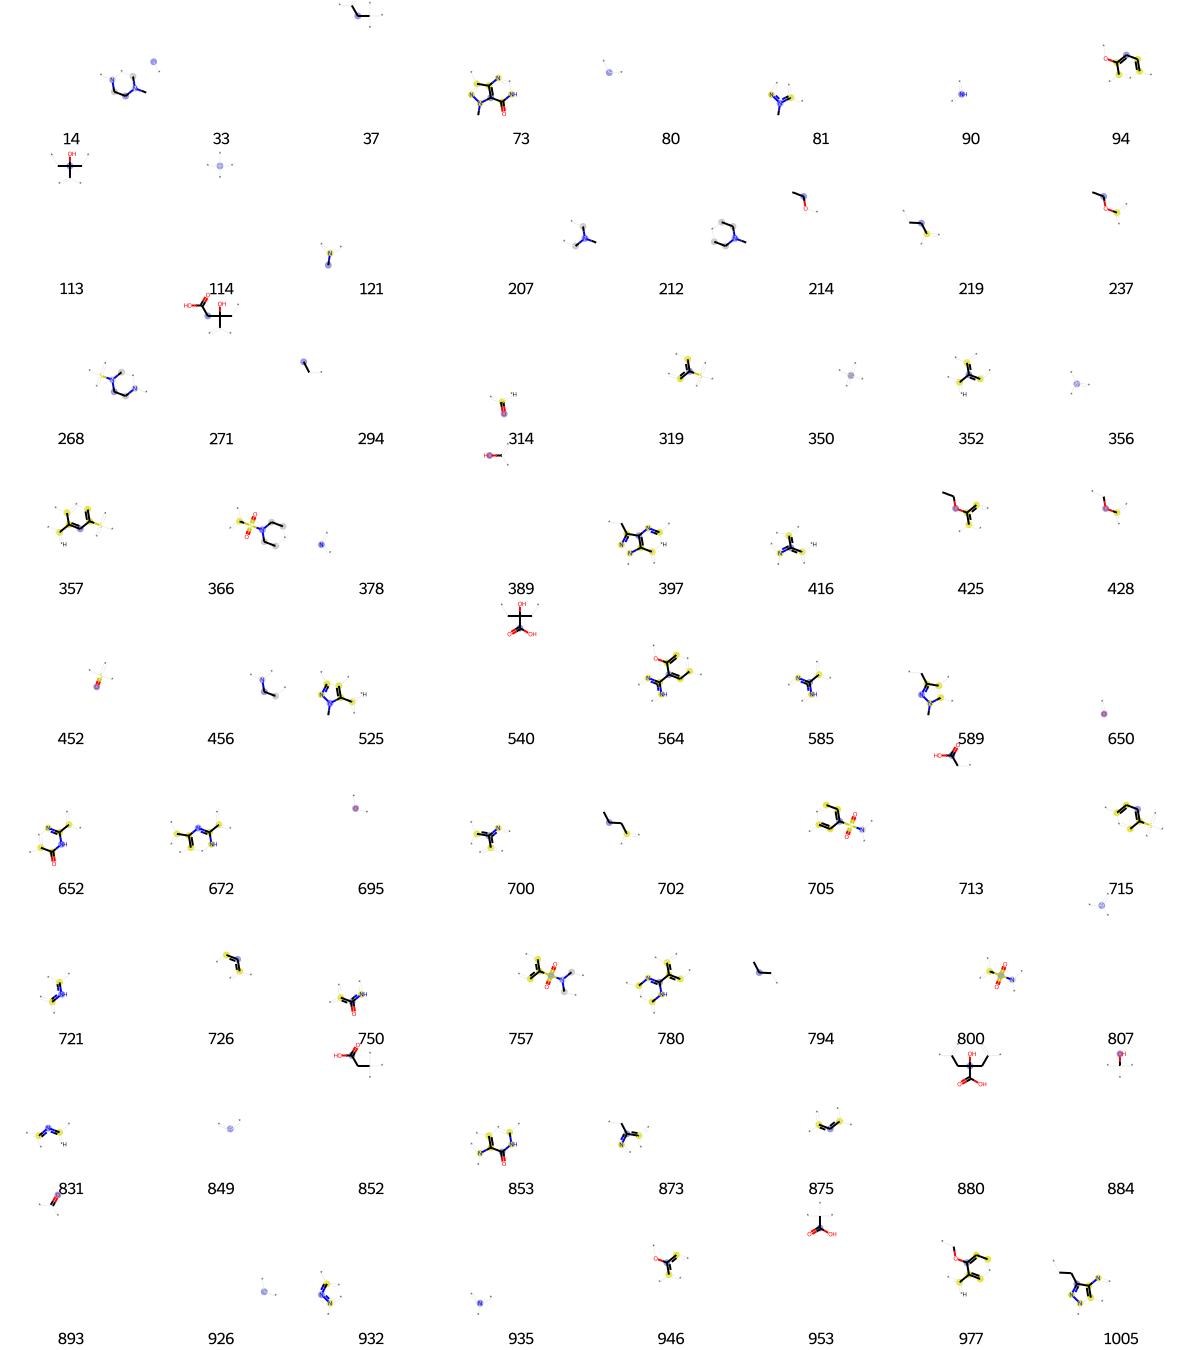

In [10702]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [10703]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[7,
 13,
 29,
 33,
 34,
 36,
 61,
 70,
 80,
 105,
 121,
 138,
 147,
 217,
 231,
 239,
 250,
 284,
 290,
 301,
 314,
 356,
 370,
 380,
 384,
 427,
 453,
 519,
 529,
 622,
 650,
 695,
 714,
 725,
 734,
 756,
 758,
 816,
 831,
 849,
 850,
 853,
 860,
 864,
 926,
 935,
 981,
 1019]

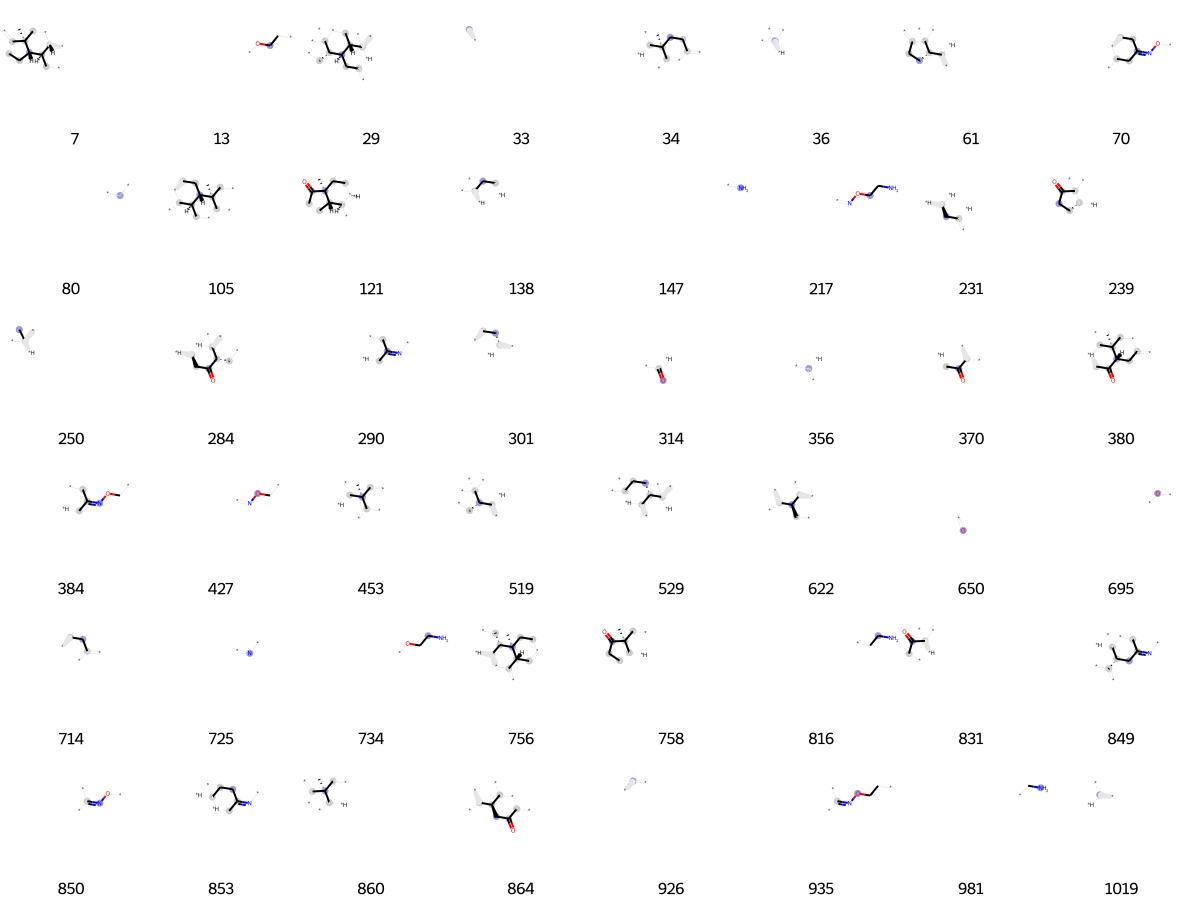

In [10704]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [10705]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[7,
 33,
 73,
 194,
 224,
 244,
 249,
 322,
 356,
 432,
 452,
 466,
 512,
 584,
 635,
 694,
 695,
 718,
 726,
 781,
 835,
 841,
 849,
 875,
 946,
 948,
 961,
 1009]

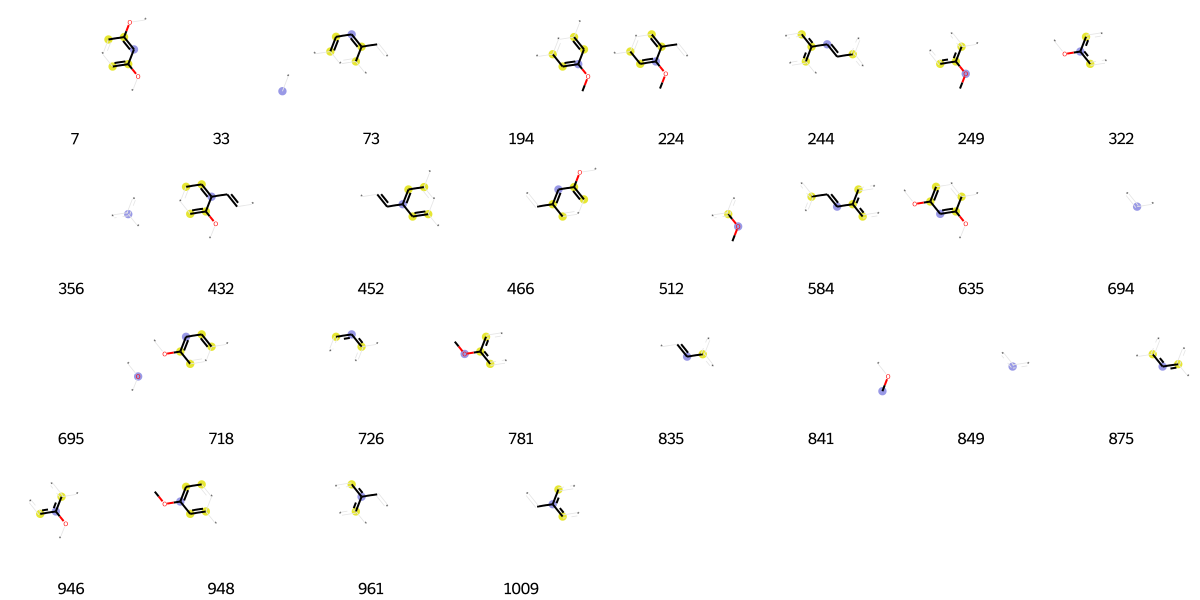

In [10706]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [10707]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[53,
 64,
 128,
 175,
 187,
 191,
 356,
 389,
 423,
 486,
 578,
 583,
 650,
 703,
 726,
 792,
 807,
 847,
 849,
 893,
 954,
 967,
 989]

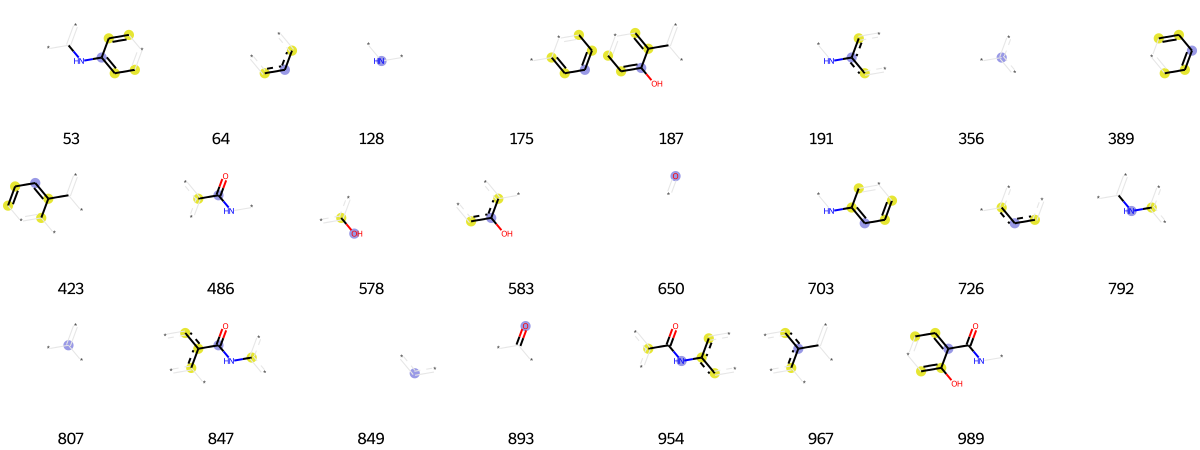

In [10708]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [10709]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 55,
 80,
 90,
 171,
 179,
 191,
 202,
 277,
 294,
 354,
 356,
 360,
 514,
 536,
 556,
 578,
 583,
 635,
 650,
 674,
 694,
 711,
 715,
 716,
 722,
 736,
 753,
 790,
 803,
 807,
 816,
 838,
 839,
 849,
 875,
 881,
 893,
 932,
 939,
 978,
 1008,
 1009]

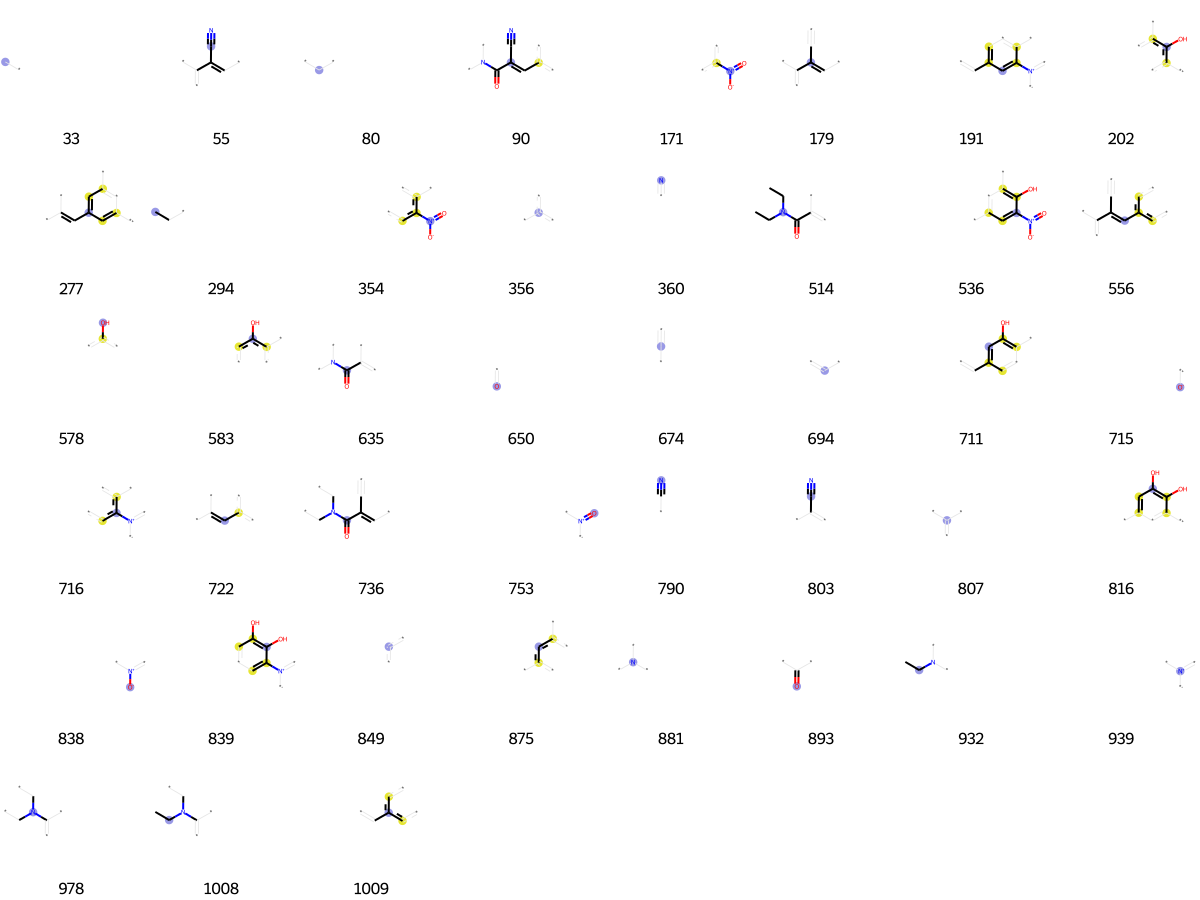

In [10710]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [10711]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[9,
 33,
 64,
 77,
 80,
 171,
 175,
 250,
 251,
 271,
 294,
 318,
 340,
 356,
 365,
 366,
 378,
 387,
 423,
 428,
 484,
 507,
 548,
 561,
 564,
 592,
 605,
 650,
 659,
 685,
 705,
 715,
 726,
 753,
 785,
 790,
 807,
 838,
 842,
 849,
 875,
 880,
 881,
 891,
 893,
 916,
 932,
 935,
 939,
 949,
 957,
 964,
 967,
 974]

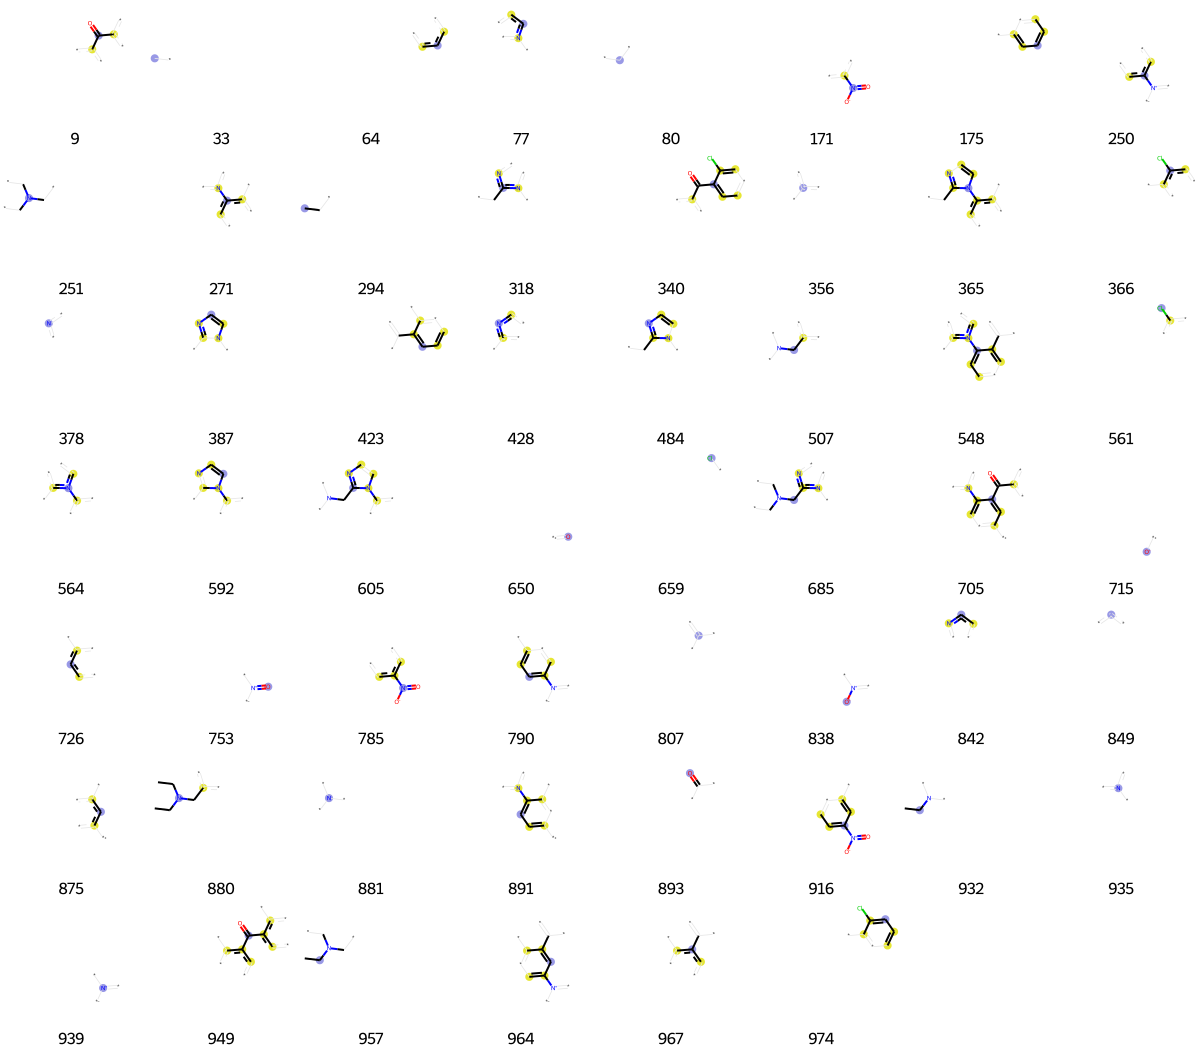

In [10712]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [10713]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[27,
 33,
 121,
 128,
 178,
 204,
 212,
 221,
 227,
 249,
 314,
 330,
 352,
 356,
 367,
 385,
 394,
 405,
 456,
 457,
 472,
 512,
 514,
 531,
 541,
 564,
 641,
 649,
 650,
 668,
 692,
 695,
 698,
 714,
 725,
 768,
 771,
 799,
 841,
 849,
 864,
 875,
 883,
 926,
 929,
 935,
 946,
 1003]

In [10714]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 45,
 64,
 80,
 86,
 90,
 120,
 128,
 157,
 175,
 197,
 249,
 255,
 259,
 261,
 283,
 294,
 295,
 301,
 314,
 315,
 333,
 350,
 356,
 384,
 390,
 452,
 456,
 466,
 478,
 486,
 512,
 549,
 585,
 586,
 598,
 610,
 616,
 634,
 650,
 695,
 698,
 721,
 726,
 742,
 750,
 778,
 807,
 813,
 841,
 845,
 849,
 862,
 875,
 879,
 893,
 926,
 935,
 946,
 947,
 954,
 975,
 1010,
 1019,
 1023]

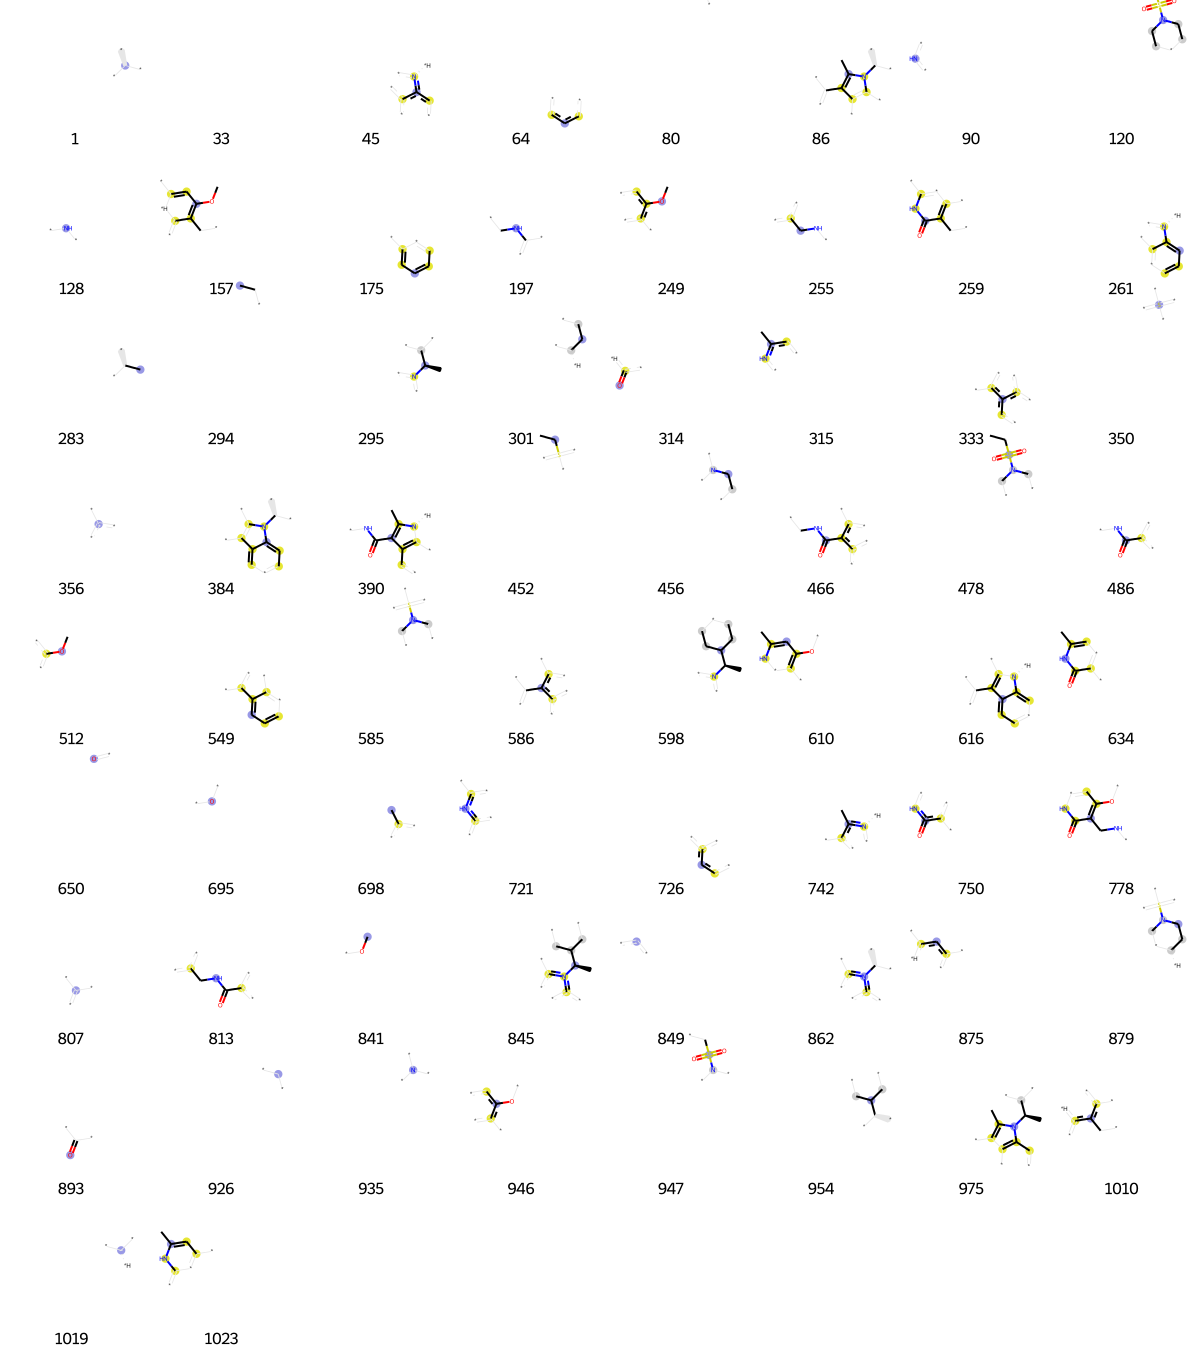

In [10715]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [10716]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 90,
 121,
 234,
 314,
 353,
 356,
 378,
 400,
 428,
 504,
 519,
 523,
 564,
 650,
 700,
 713,
 743,
 771,
 801,
 806,
 834,
 849,
 860,
 935,
 983]

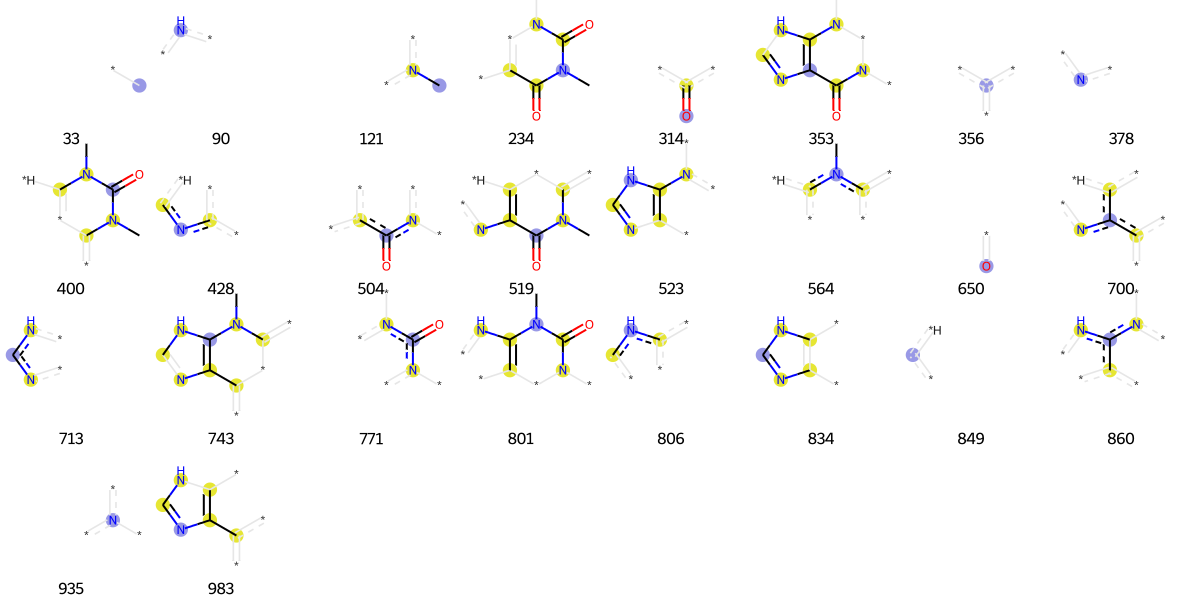

In [10717]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [10718]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[19,
 27,
 33,
 34,
 64,
 80,
 142,
 165,
 212,
 216,
 323,
 352,
 355,
 356,
 378,
 408,
 428,
 448,
 456,
 502,
 511,
 561,
 570,
 571,
 579,
 589,
 641,
 645,
 659,
 680,
 684,
 698,
 714,
 726,
 730,
 741,
 747,
 750,
 767,
 768,
 779,
 784,
 799,
 816,
 826,
 835,
 840,
 842,
 849,
 875,
 882,
 926,
 935,
 969]

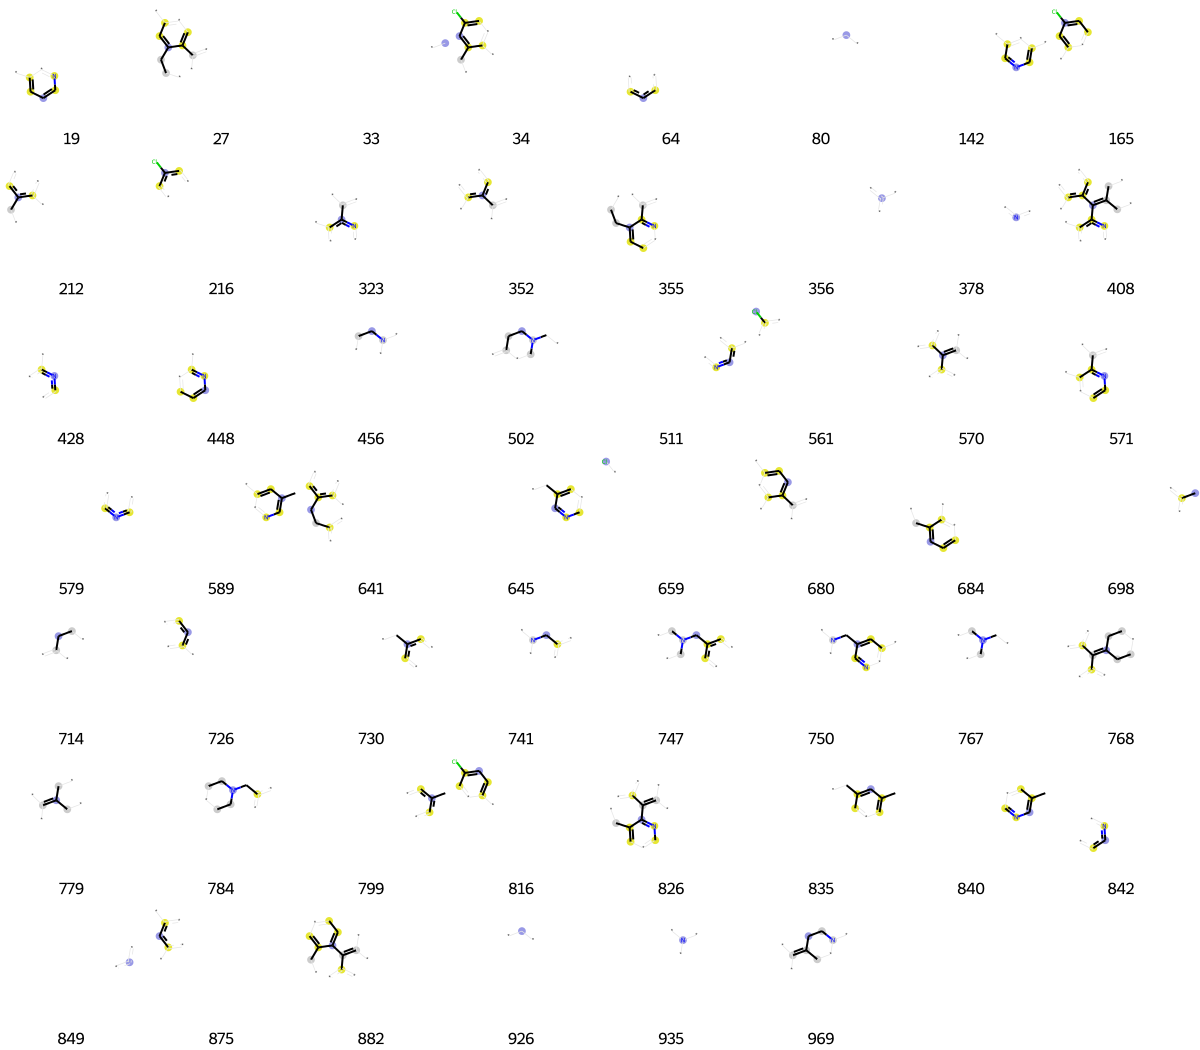

In [10719]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [10720]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 33,
 64,
 79,
 80,
 90,
 117,
 119,
 128,
 136,
 139,
 175,
 197,
 307,
 310,
 325,
 328,
 333,
 356,
 361,
 364,
 374,
 389,
 453,
 512,
 527,
 549,
 552,
 573,
 583,
 600,
 648,
 650,
 698,
 726,
 730,
 736,
 750,
 759,
 799,
 806,
 807,
 820,
 837,
 849,
 851,
 855,
 857,
 875,
 881,
 888,
 893,
 896,
 897,
 913,
 929,
 940,
 946,
 992]

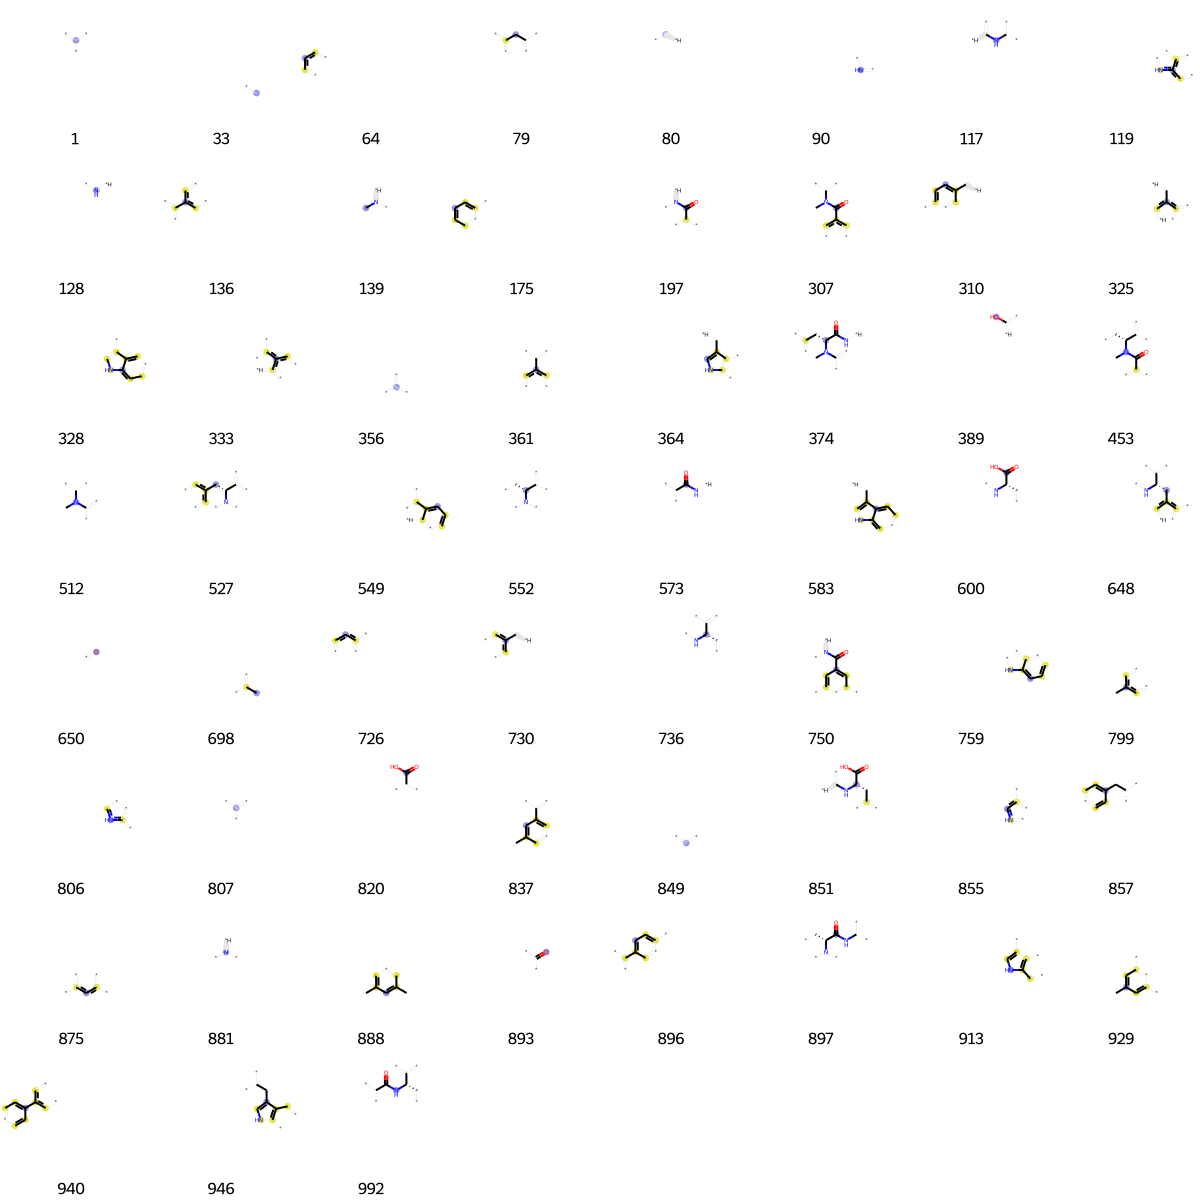

In [10721]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [10722]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[7,
 16,
 33,
 36,
 71,
 80,
 84,
 88,
 105,
 120,
 138,
 151,
 182,
 195,
 206,
 222,
 242,
 250,
 262,
 279,
 301,
 314,
 356,
 408,
 453,
 479,
 494,
 504,
 511,
 519,
 529,
 562,
 622,
 640,
 650,
 714,
 807,
 841,
 849,
 860,
 893,
 926,
 927,
 1005,
 1019]

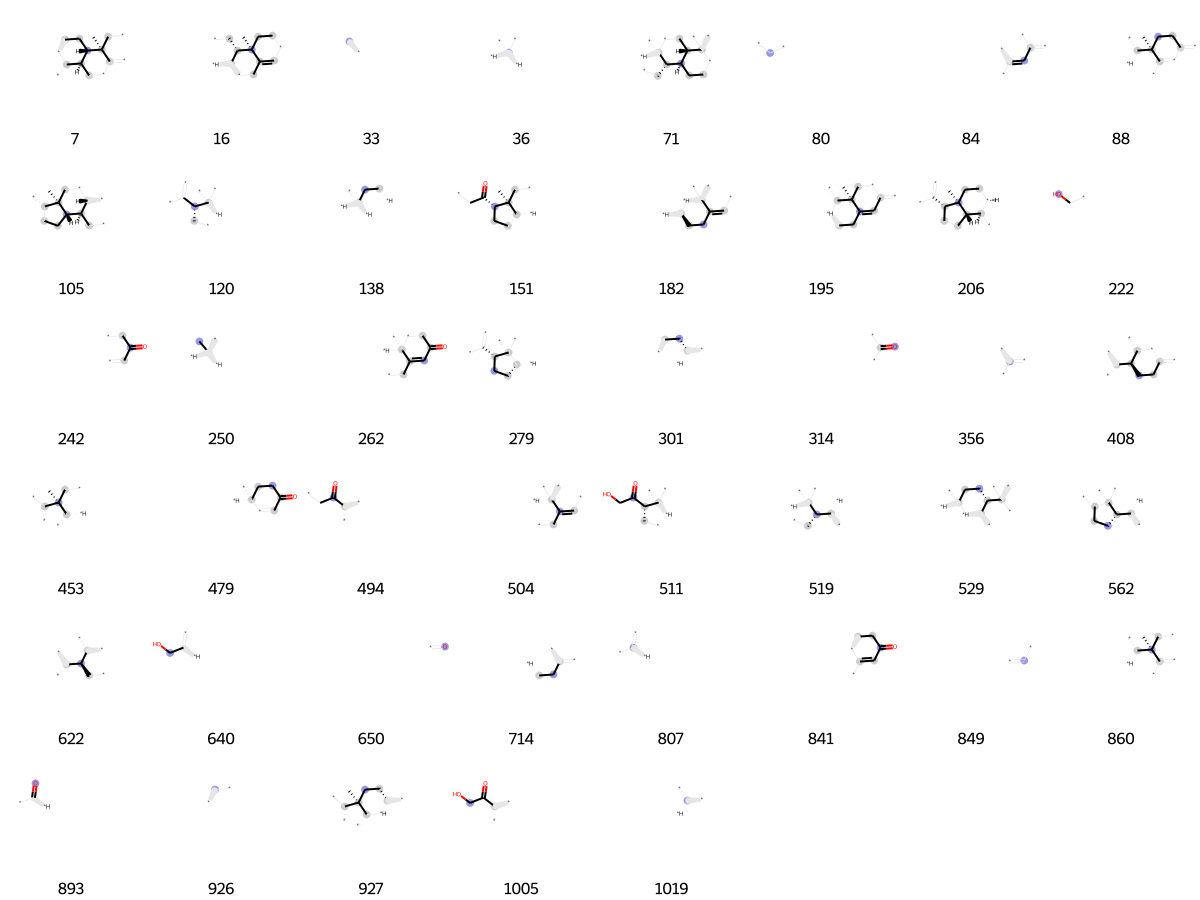

In [10723]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [10724]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 33,
 60,
 73,
 102,
 115,
 191,
 214,
 227,
 231,
 237,
 268,
 301,
 322,
 333,
 342,
 356,
 378,
 390,
 401,
 428,
 456,
 468,
 512,
 584,
 585,
 593,
 595,
 613,
 621,
 629,
 638,
 694,
 695,
 718,
 726,
 739,
 741,
 781,
 787,
 807,
 830,
 841,
 842,
 849,
 852,
 875,
 926,
 935,
 940,
 948,
 961,
 1019,
 1022]

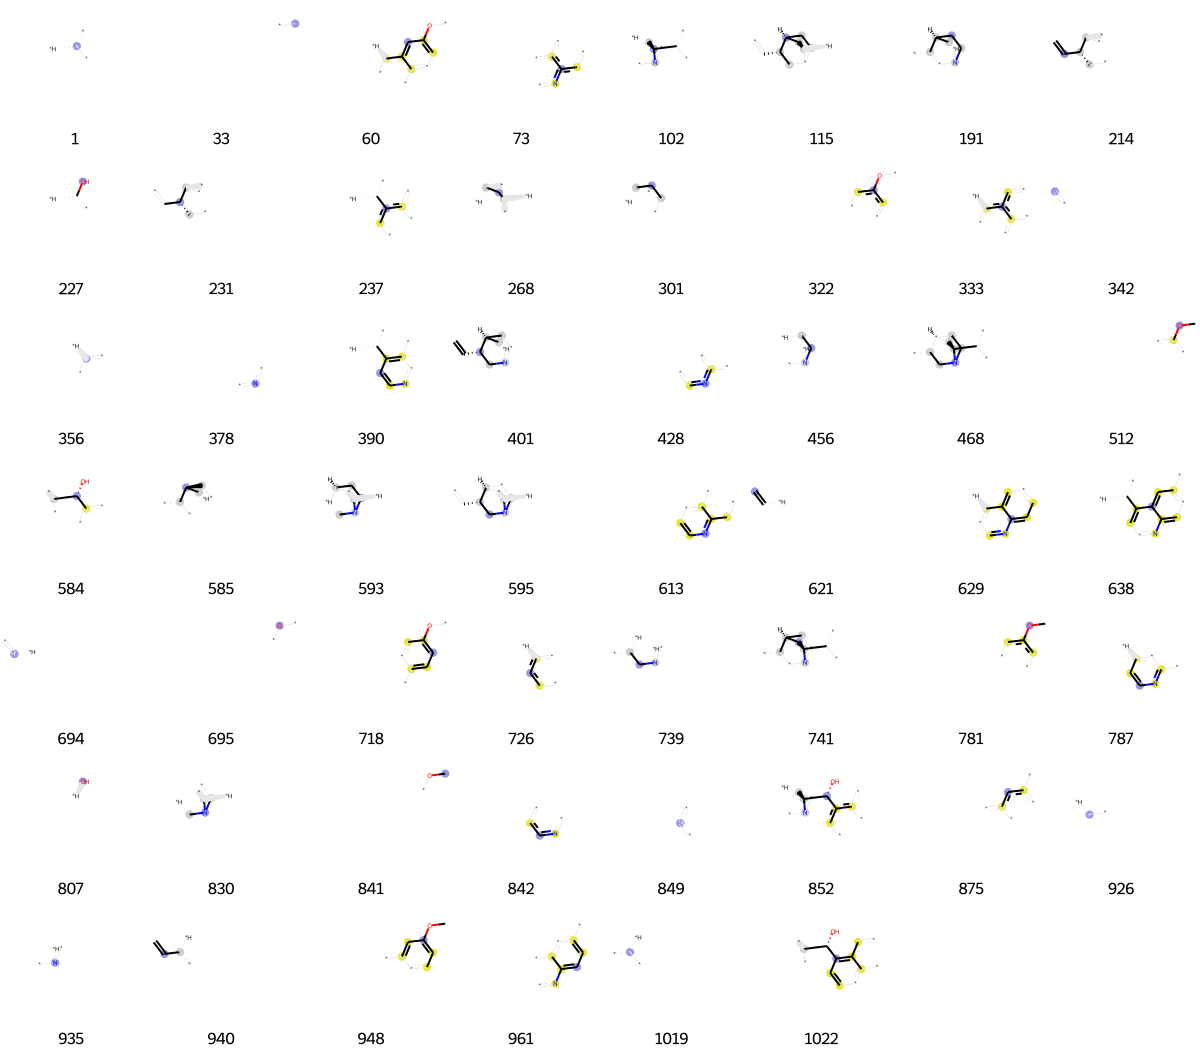

In [10725]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [10726]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[19,
 33,
 36,
 56,
 64,
 71,
 74,
 80,
 81,
 90,
 114,
 128,
 139,
 175,
 191,
 212,
 255,
 259,
 262,
 314,
 319,
 325,
 329,
 342,
 350,
 356,
 367,
 370,
 378,
 389,
 392,
 402,
 419,
 428,
 429,
 448,
 452,
 456,
 457,
 458,
 478,
 491,
 511,
 540,
 544,
 551,
 558,
 562,
 573,
 575,
 587,
 592,
 622,
 624,
 626,
 650,
 653,
 678,
 692,
 702,
 708,
 726,
 786,
 807,
 809,
 831,
 842,
 843,
 849,
 859,
 875,
 881,
 904,
 920,
 926,
 933,
 940,
 958]

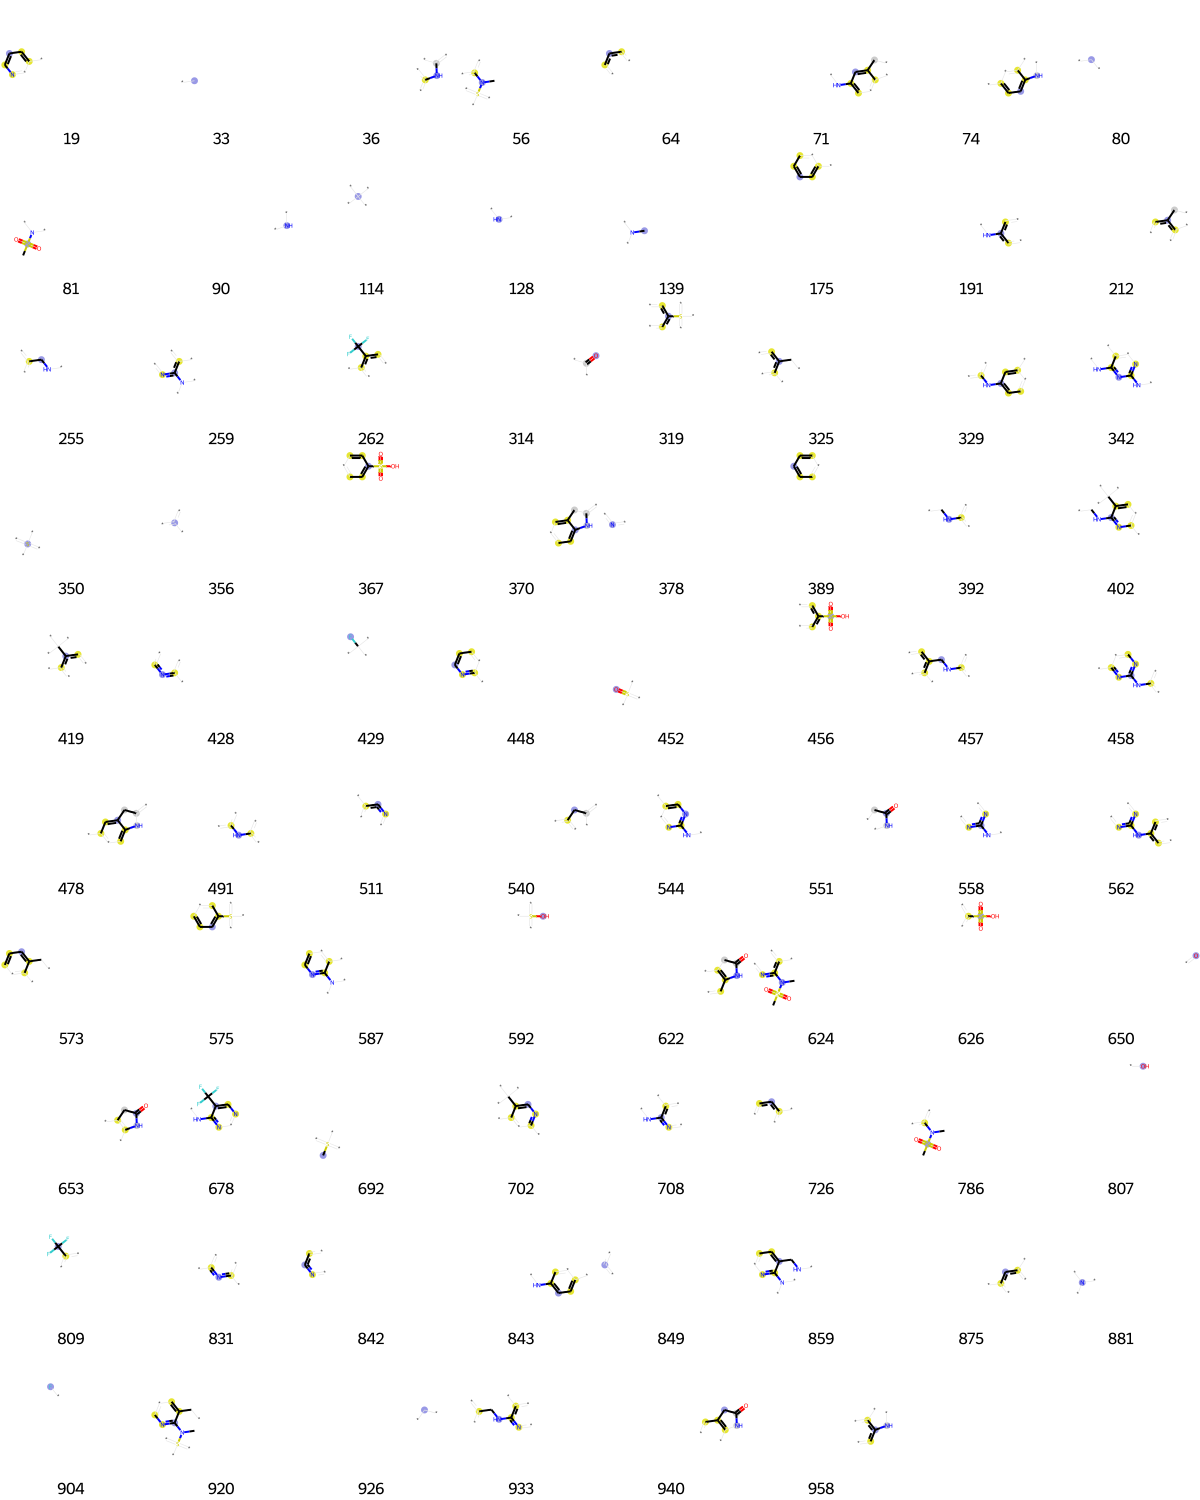

In [10727]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [10728]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[3,
 11,
 33,
 36,
 70,
 80,
 102,
 112,
 139,
 180,
 220,
 233,
 250,
 258,
 294,
 305,
 350,
 356,
 360,
 400,
 440,
 452,
 492,
 624,
 650,
 656,
 673,
 674,
 701,
 726,
 790,
 794,
 804,
 807,
 849,
 864,
 875,
 881,
 930,
 931,
 951,
 1019]

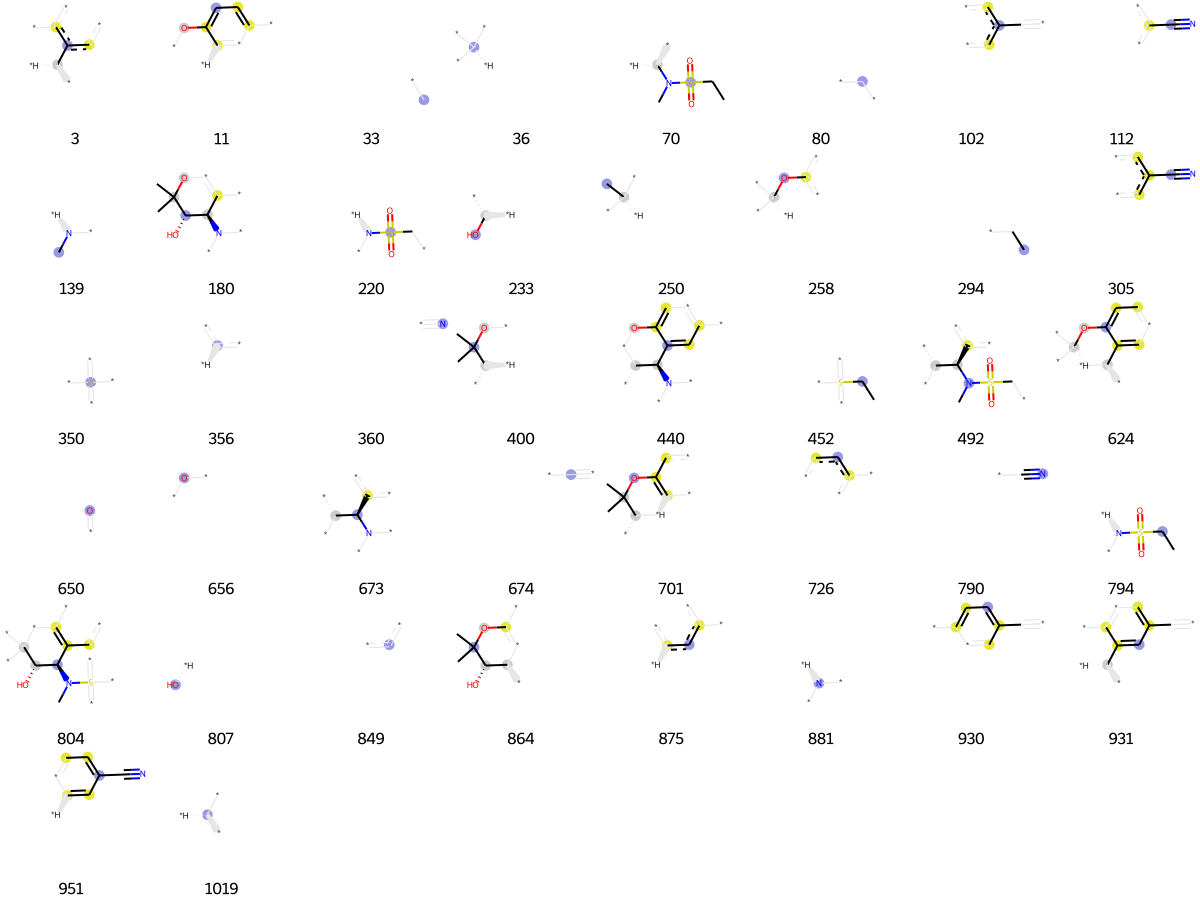

In [10729]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [10730]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33,
 60,
 72,
 73,
 144,
 147,
 203,
 276,
 320,
 343,
 356,
 364,
 378,
 433,
 463,
 489,
 514,
 588,
 600,
 647,
 673,
 678,
 726,
 826,
 831,
 842,
 849,
 875,
 888]

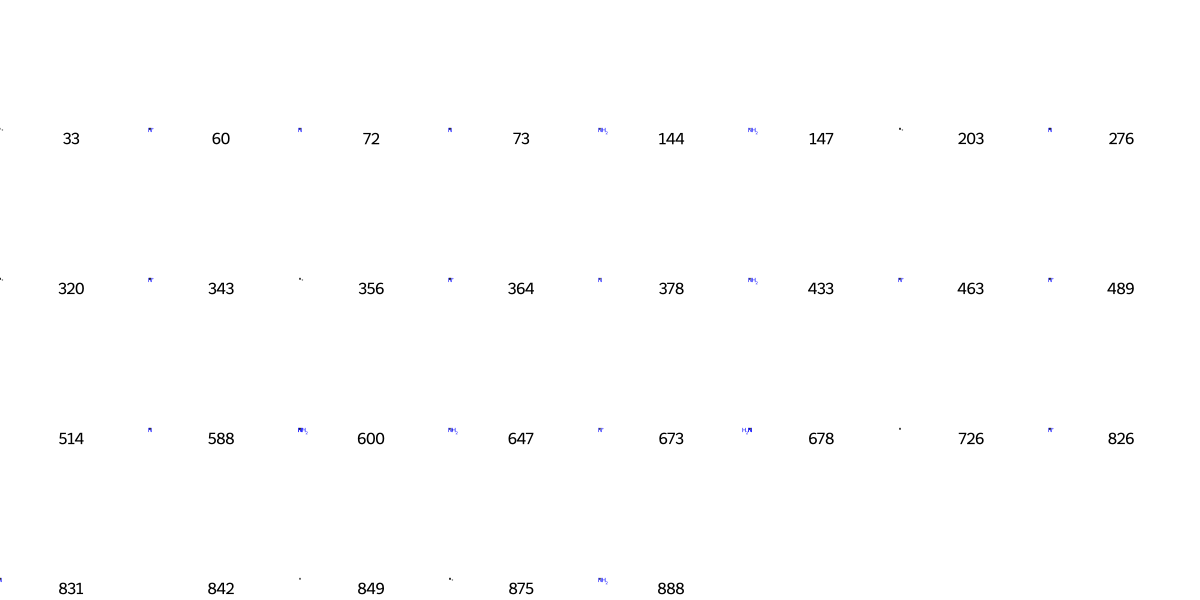

In [10731]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [10732]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 3,
 33,
 79,
 80,
 94,
 140,
 221,
 249,
 283,
 310,
 356,
 512,
 579,
 695,
 726,
 730,
 749,
 761,
 841,
 849,
 875,
 946,
 966]

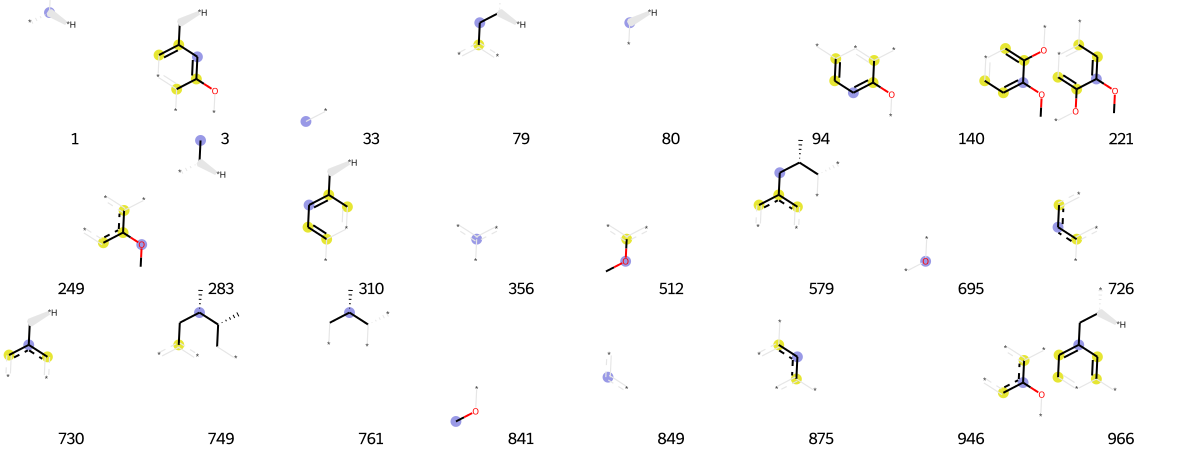

In [10733]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [10734]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[3,
 15,
 33,
 42,
 43,
 45,
 50,
 64,
 72,
 80,
 81,
 82,
 85,
 90,
 96,
 112,
 122,
 128,
 147,
 158,
 168,
 181,
 191,
 192,
 195,
 197,
 200,
 230,
 252,
 302,
 305,
 329,
 343,
 353,
 356,
 365,
 378,
 397,
 405,
 416,
 422,
 428,
 463,
 464,
 483,
 489,
 491,
 511,
 523,
 572,
 616,
 646,
 650,
 656,
 695,
 698,
 699,
 708,
 709,
 720,
 726,
 730,
 734,
 741,
 744,
 792,
 807,
 817,
 831,
 843,
 849,
 875,
 888,
 893,
 899,
 902,
 904,
 926,
 935,
 950,
 997,
 1013,
 1019,
 1022]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


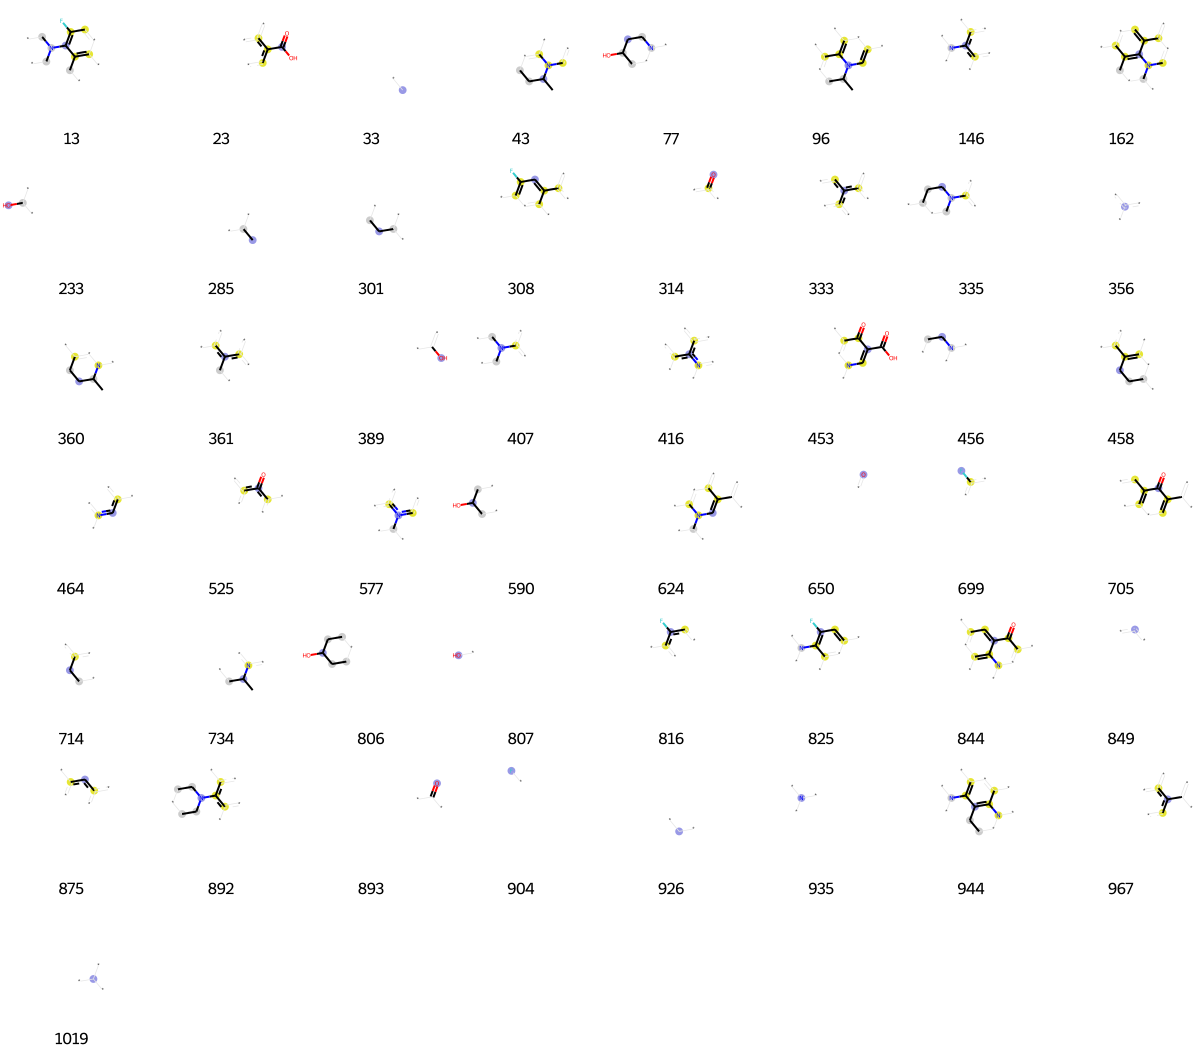

In [10735]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [10736]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 64,
 79,
 80,
 90,
 119,
 147,
 175,
 197,
 325,
 328,
 333,
 356,
 364,
 389,
 403,
 549,
 583,
 650,
 661,
 726,
 759,
 786,
 806,
 807,
 820,
 825,
 849,
 855,
 893,
 913,
 946]

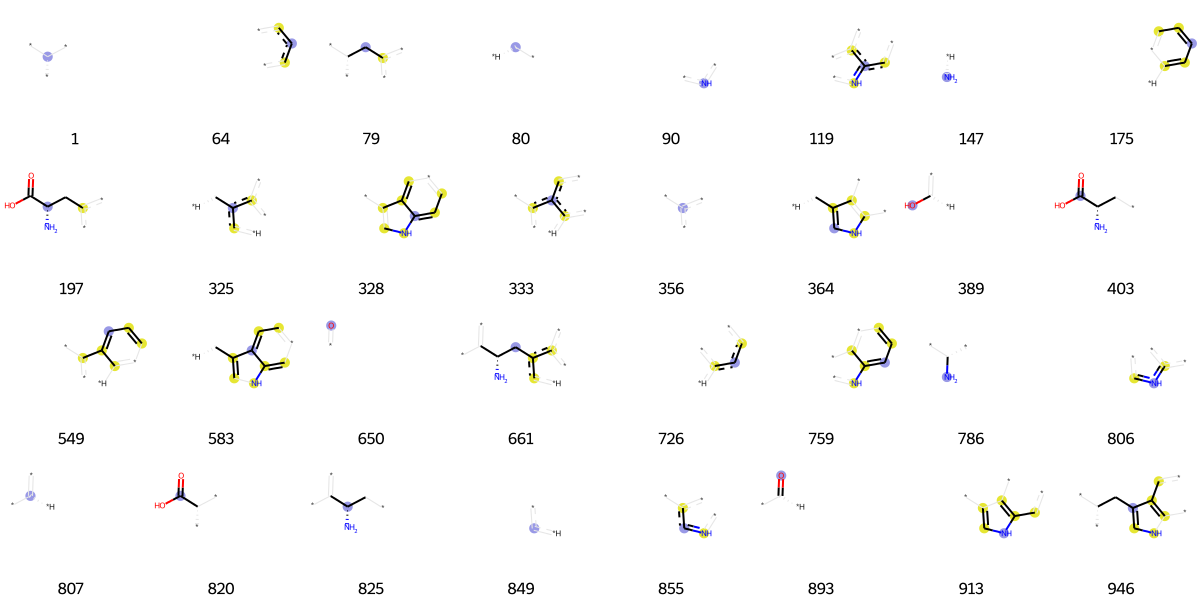

In [10737]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [10738]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[8,
 15,
 33,
 64,
 80,
 128,
 200,
 235,
 325,
 346,
 356,
 366,
 381,
 383,
 389,
 420,
 468,
 491,
 561,
 650,
 659,
 698,
 699,
 701,
 713,
 726,
 793,
 799,
 807,
 816,
 832,
 849,
 875,
 893,
 904,
 914,
 974,
 976,
 1013]

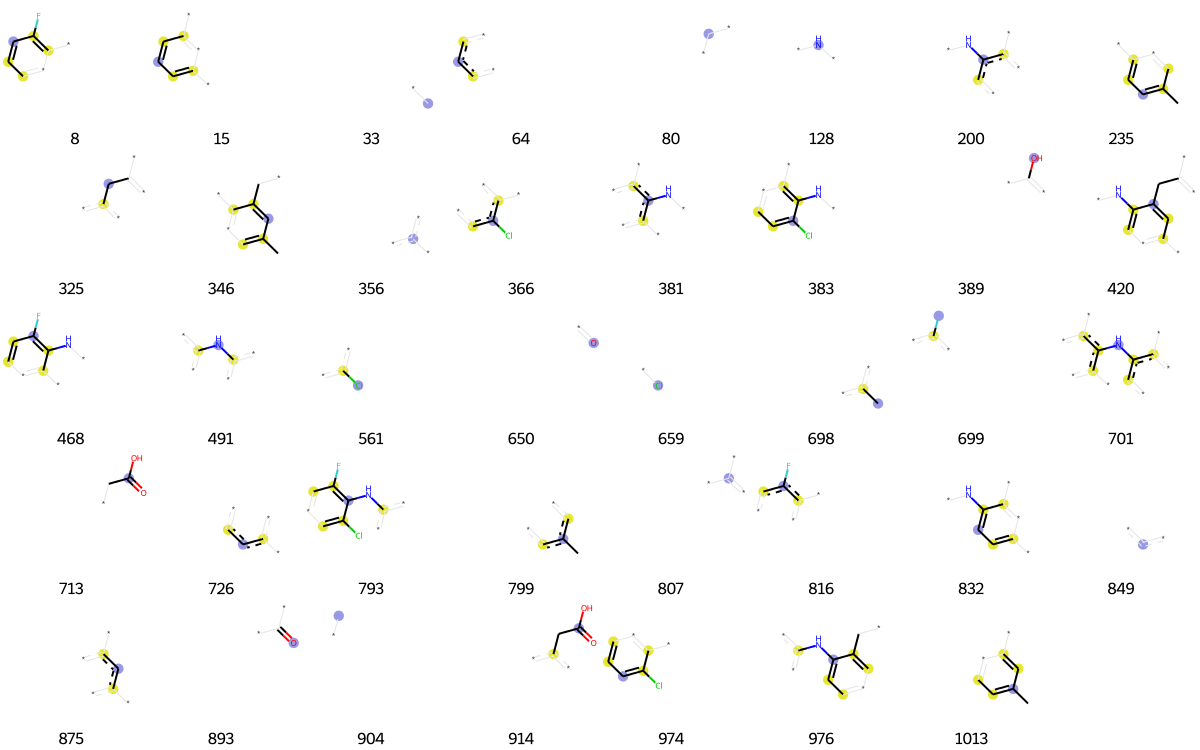

In [10739]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [10740]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[7,
 11,
 16,
 33,
 36,
 71,
 84,
 88,
 129,
 138,
 155,
 182,
 195,
 242,
 250,
 255,
 262,
 301,
 314,
 356,
 408,
 412,
 424,
 460,
 479,
 504,
 507,
 519,
 529,
 555,
 565,
 622,
 650,
 695,
 697,
 714,
 718,
 807,
 841,
 849,
 860,
 893,
 926,
 947,
 1017,
 1019]

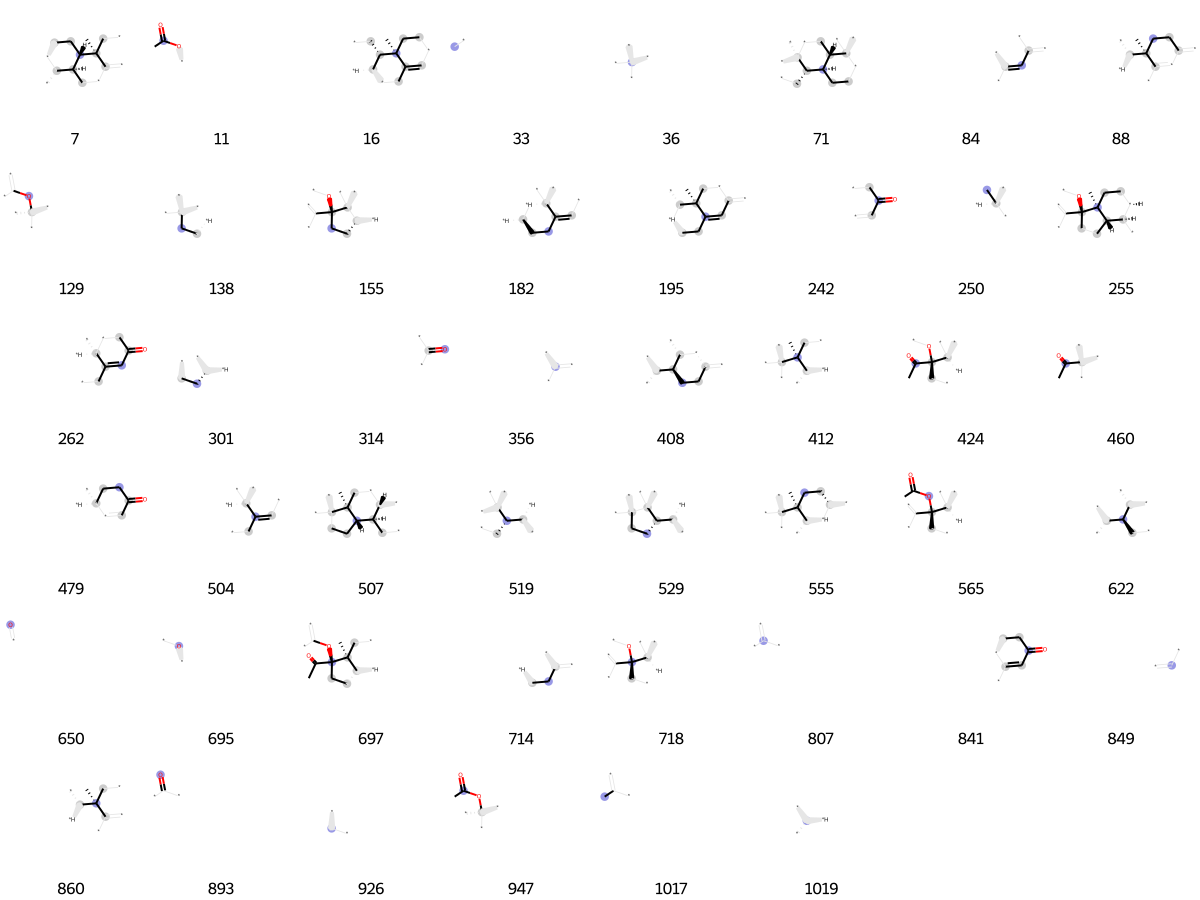

In [10741]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [10742]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 36,
 62,
 77,
 80,
 130,
 147,
 170,
 222,
 233,
 250,
 297,
 314,
 356,
 378,
 424,
 433,
 485,
 492,
 498,
 577,
 606,
 610,
 612,
 650,
 656,
 688,
 726,
 740,
 745,
 783,
 807,
 831,
 844,
 849,
 863,
 897,
 935,
 955,
 1018,
 1019]

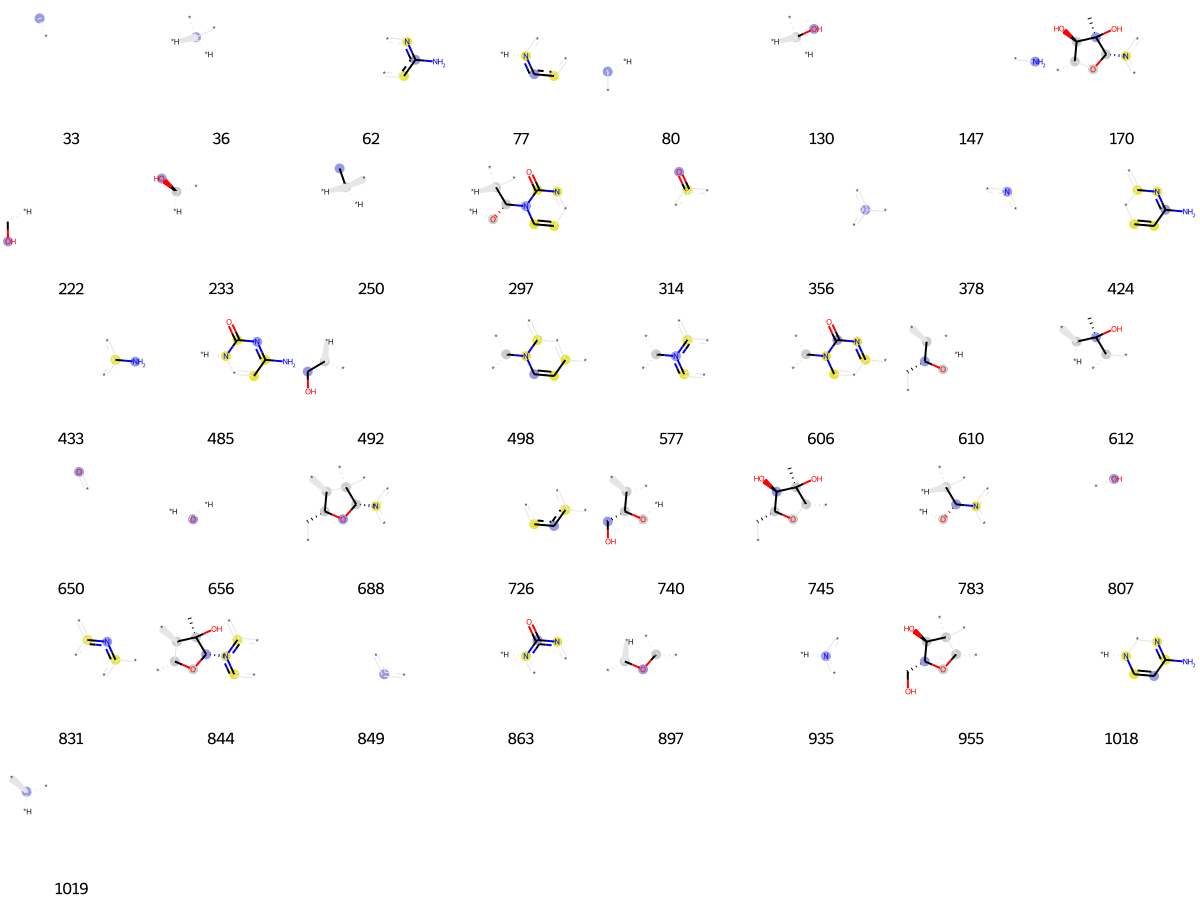

In [10743]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [10744]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[0,
 1,
 11,
 33,
 42,
 64,
 79,
 80,
 86,
 116,
 117,
 128,
 140,
 144,
 147,
 158,
 175,
 188,
 351,
 356,
 369,
 389,
 394,
 491,
 534,
 573,
 594,
 618,
 650,
 720,
 725,
 726,
 730,
 736,
 739,
 786,
 798,
 807,
 825,
 849,
 857,
 887,
 890,
 893,
 902,
 918,
 966,
 978,
 980,
 982,
 992,
 1017]

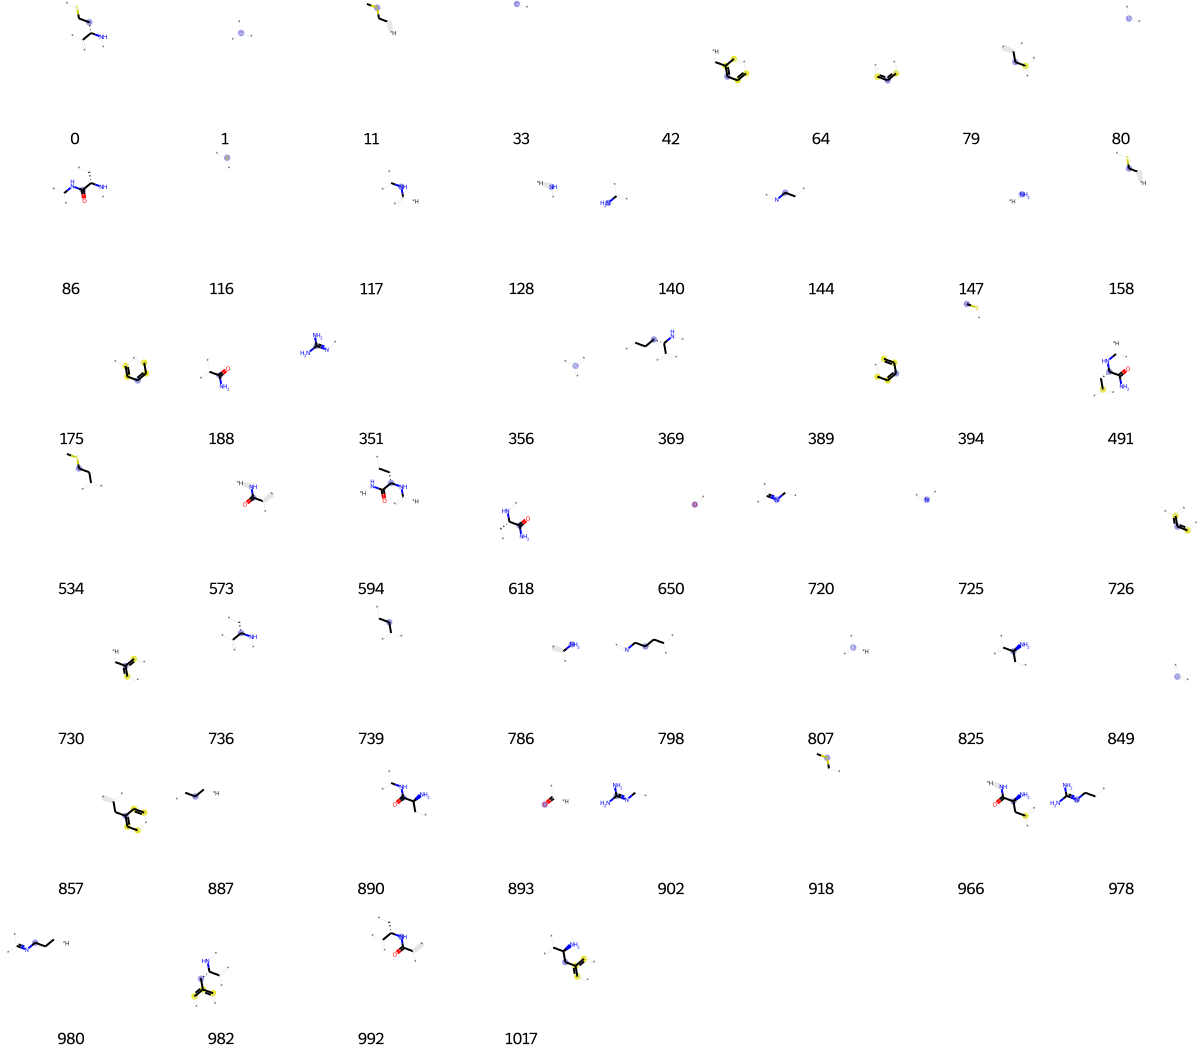

In [10745]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [10746]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[19,
 34,
 64,
 87,
 90,
 102,
 112,
 128,
 136,
 200,
 286,
 305,
 333,
 356,
 360,
 361,
 378,
 426,
 428,
 437,
 463,
 477,
 486,
 503,
 511,
 562,
 579,
 650,
 674,
 714,
 726,
 735,
 771,
 790,
 792,
 806,
 807,
 842,
 849,
 855,
 856,
 875,
 893,
 896,
 930,
 938,
 940,
 947,
 961,
 970]

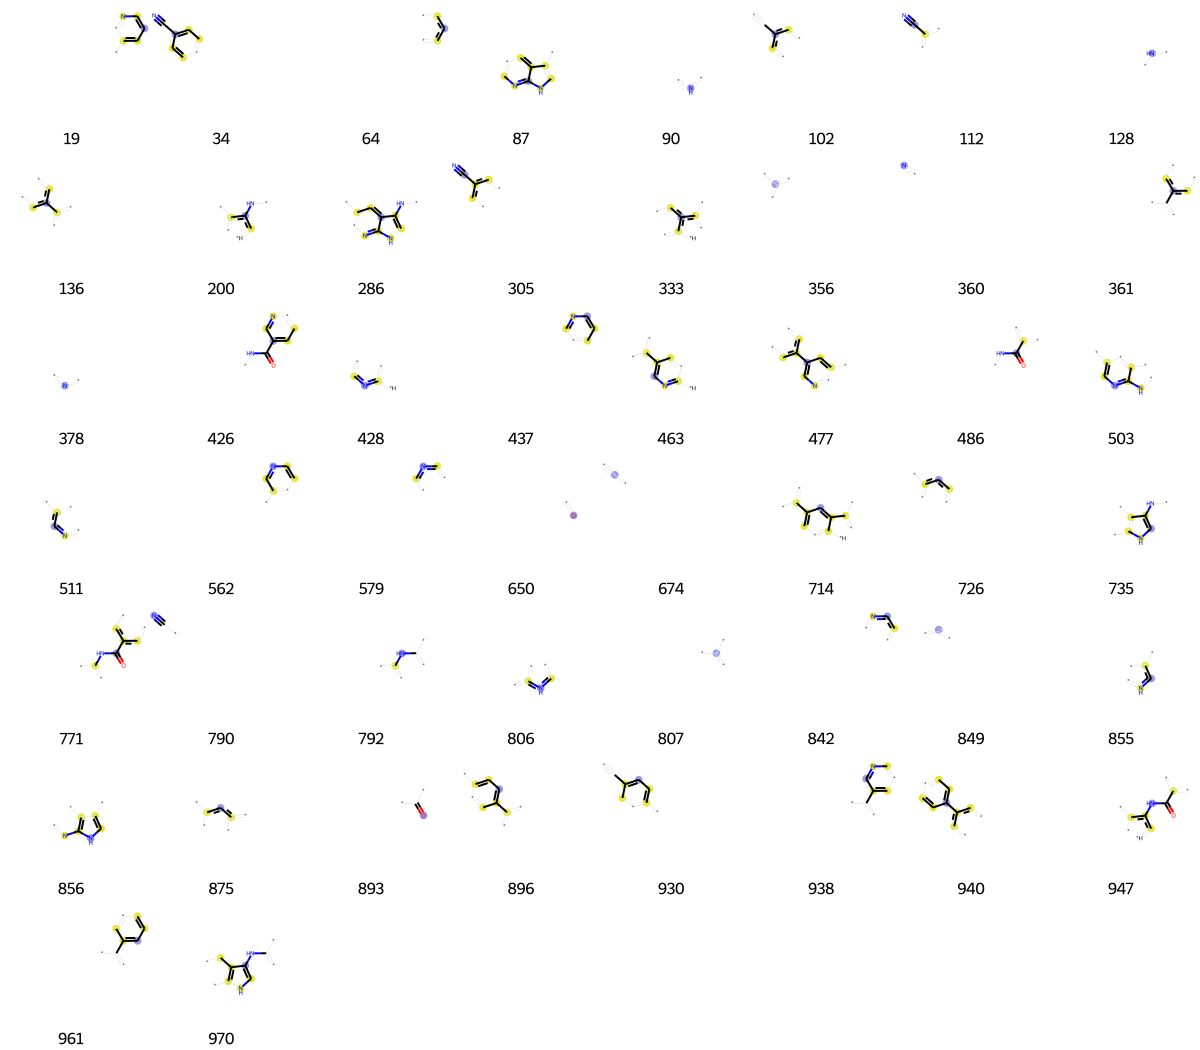

In [10747]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [10748]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[3,
 11,
 33,
 40,
 43,
 54,
 77,
 90,
 133,
 165,
 206,
 210,
 219,
 233,
 250,
 285,
 301,
 314,
 352,
 356,
 378,
 383,
 386,
 463,
 470,
 511,
 515,
 524,
 633,
 636,
 646,
 650,
 655,
 656,
 672,
 681,
 699,
 716,
 726,
 750,
 831,
 842,
 849,
 875,
 876,
 881,
 904,
 905,
 914,
 915,
 926,
 935,
 941,
 955,
 1019]

In [10749]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[4,
 33,
 92,
 128,
 144,
 147,
 217,
 232,
 246,
 248,
 252,
 319,
 350,
 356,
 378,
 414,
 420,
 433,
 448,
 452,
 483,
 502,
 518,
 613,
 650,
 656,
 698,
 715,
 726,
 780,
 849,
 883,
 888]

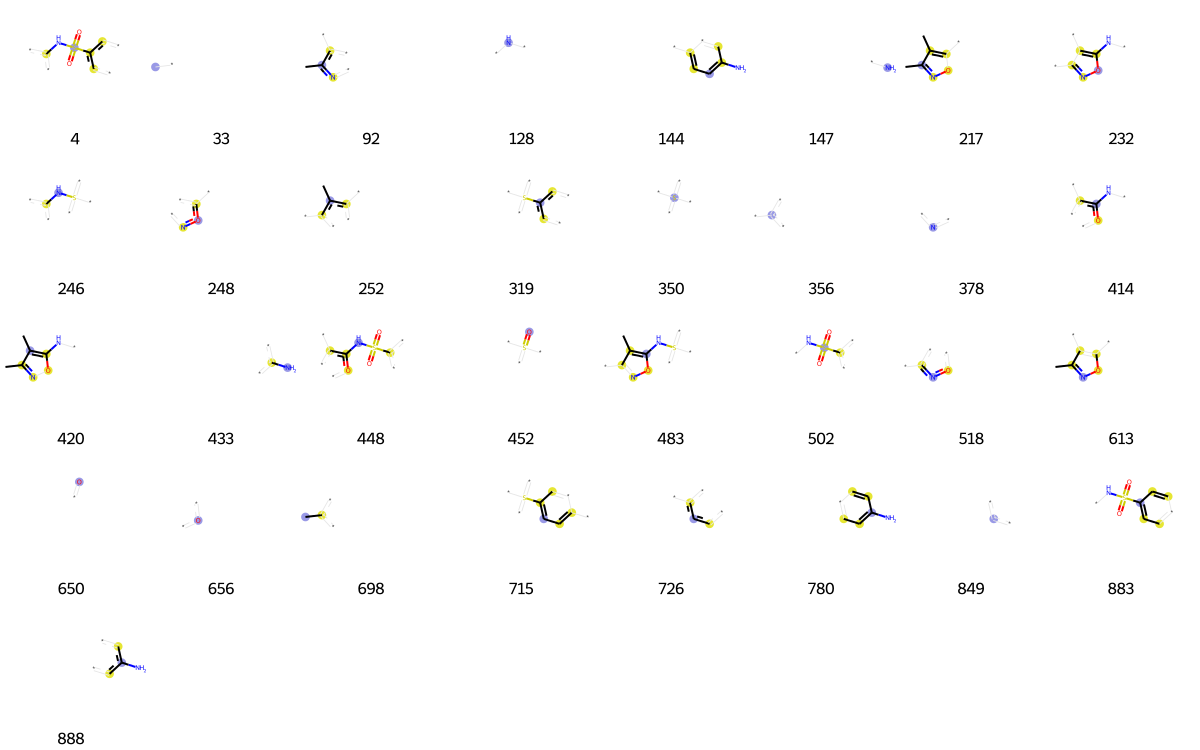

In [10750]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [10751]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 15,
 33,
 64,
 90,
 121,
 237,
 252,
 266,
 283,
 356,
 367,
 378,
 428,
 441,
 501,
 518,
 581,
 590,
 623,
 625,
 670,
 698,
 713,
 726,
 775,
 849,
 855,
 931,
 975]

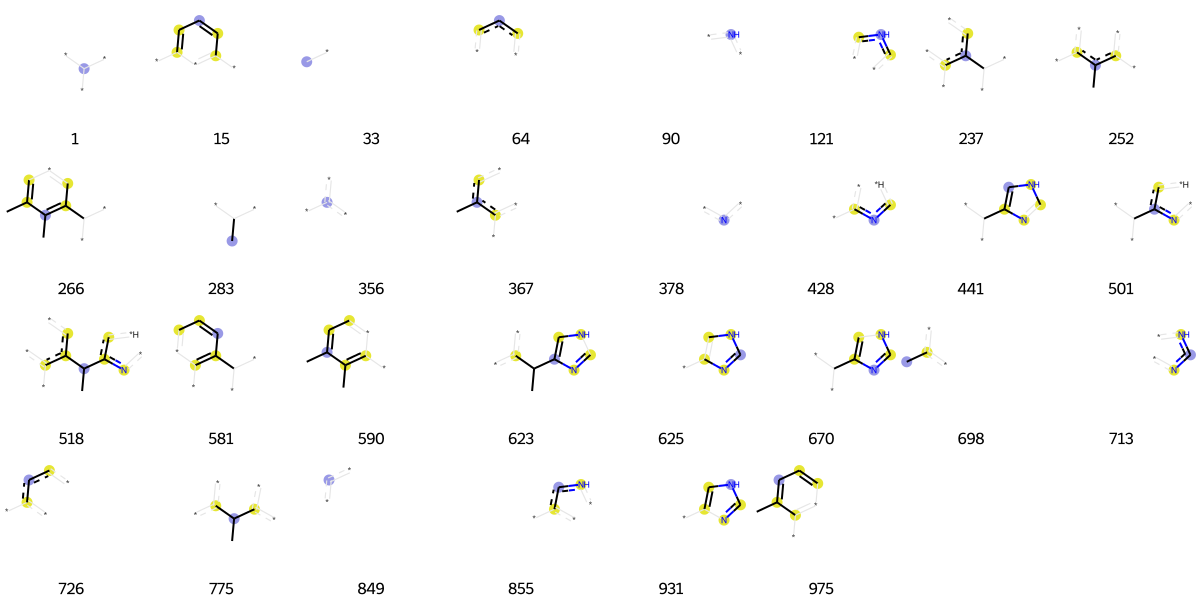

In [10752]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [10753]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[12,
 29,
 67,
 80,
 104,
 112,
 122,
 128,
 147,
 200,
 216,
 301,
 356,
 366,
 381,
 396,
 421,
 447,
 470,
 486,
 491,
 517,
 561,
 570,
 614,
 626,
 647,
 650,
 659,
 661,
 695,
 699,
 701,
 726,
 807,
 815,
 816,
 832,
 836,
 849,
 859,
 875,
 888,
 893,
 904,
 926,
 947,
 967,
 999,
 1019]

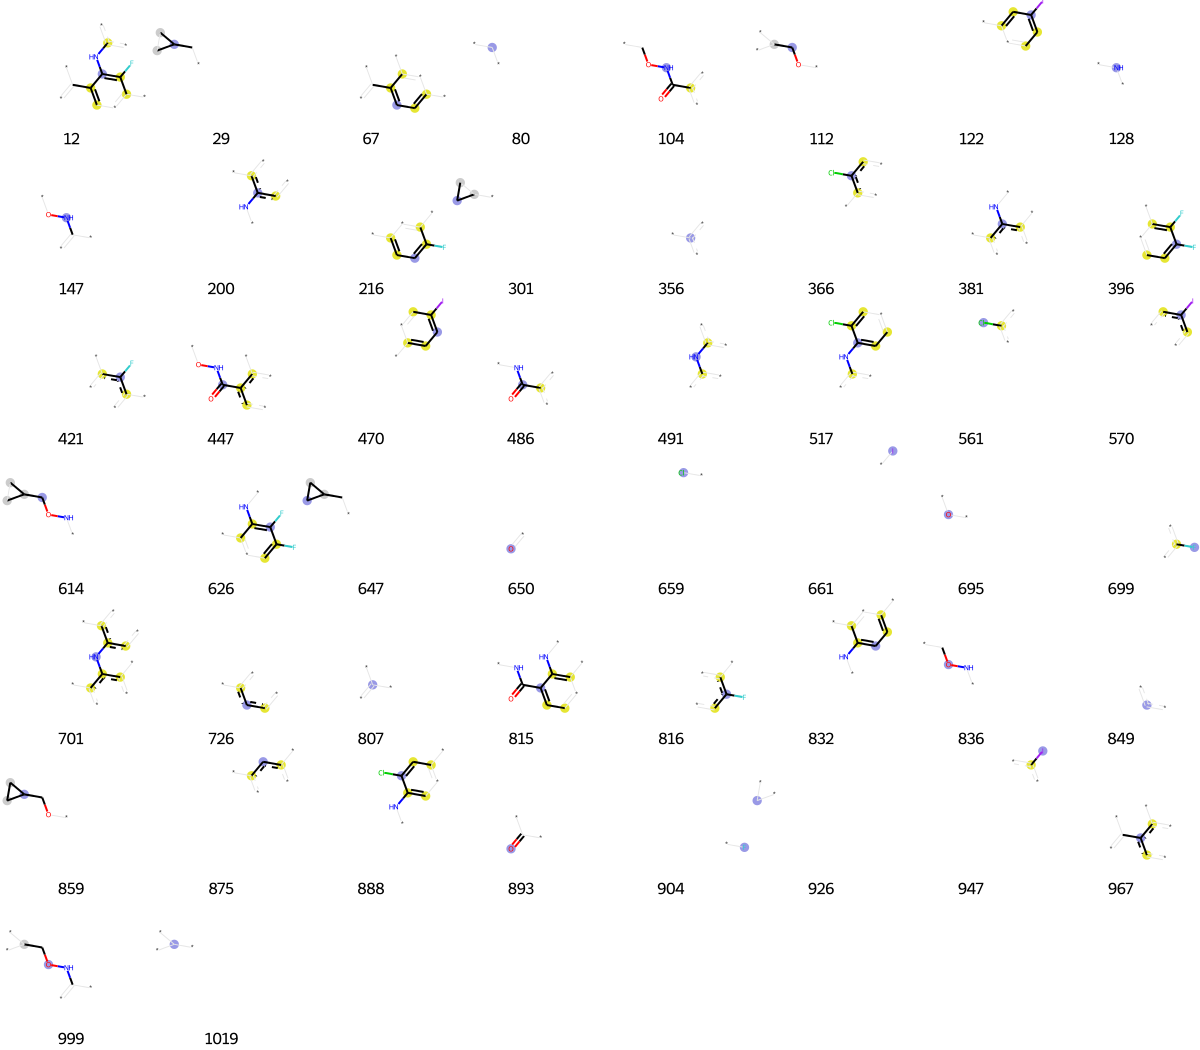

In [10754]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [10755]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[42,
 61,
 64,
 80,
 104,
 110,
 128,
 138,
 140,
 147,
 175,
 219,
 255,
 282,
 309,
 310,
 342,
 356,
 366,
 378,
 389,
 392,
 428,
 438,
 451,
 483,
 511,
 544,
 558,
 561,
 578,
 583,
 596,
 637,
 638,
 650,
 659,
 667,
 708,
 726,
 730,
 763,
 807,
 831,
 849,
 875,
 893,
 933,
 934,
 950,
 967,
 980]

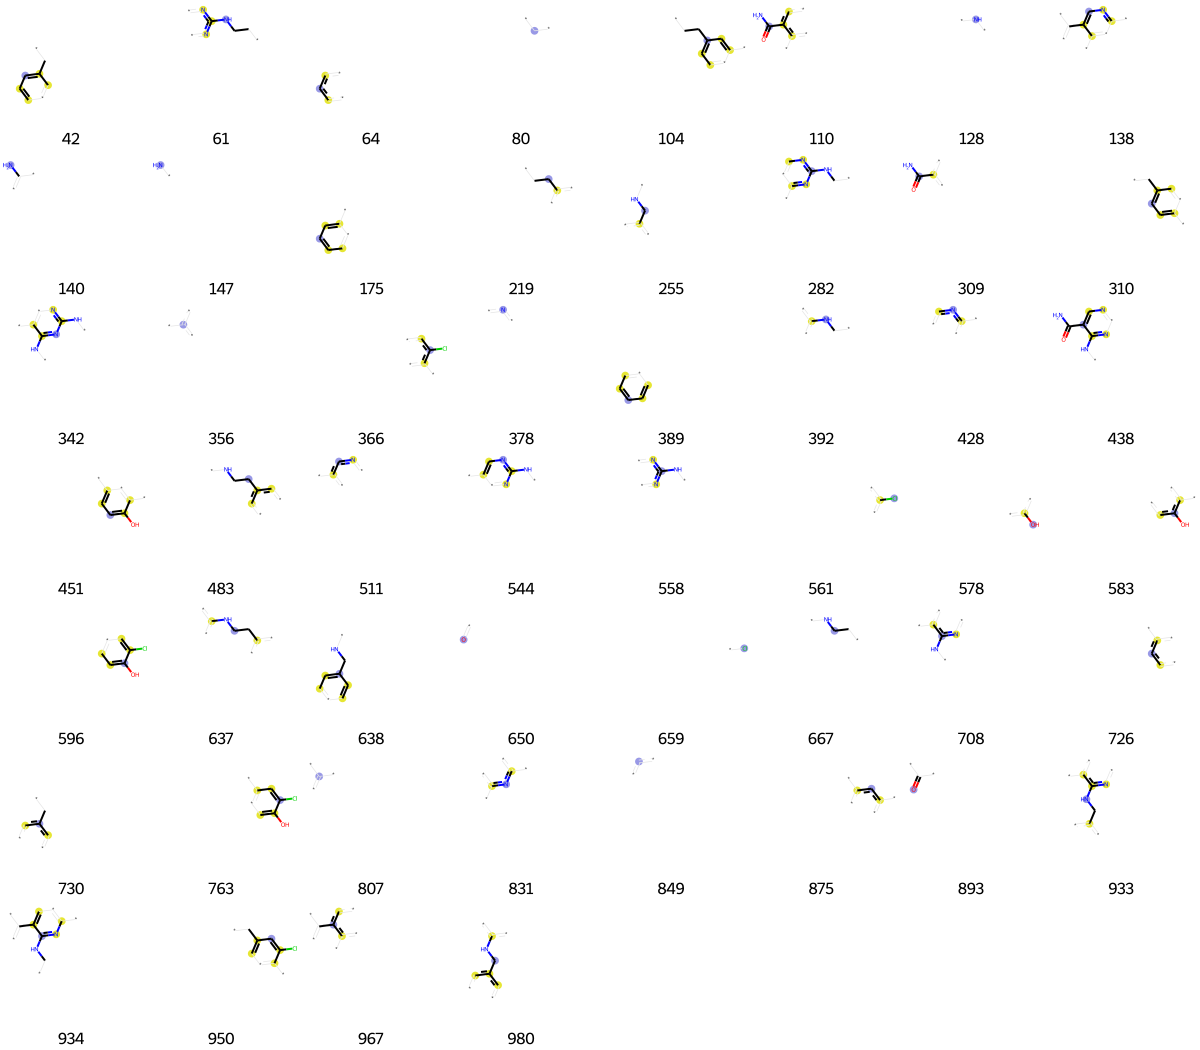

In [10756]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])